## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.image as mpimg
import MDAnalysis as mda
from MDAnalysis.analysis import distances
import mdtraj as md
import matplotlib as mpl
chain_length = 38
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/'

with open('/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst5/Stuff/Ref.out', 'r') as Ref:
    lines = Ref.readlines()
    ref = lines[160]
    print(ref)
Ref.close()

import sys
sys.path.append('/Users/oskarsvensson/Science/FILES/NOTEBOOK/decomp_and_more/')
from integer_based_decomposition import int_decomp
from contour_plotter import contour_plotter

colors = ['darkblue', 'darkviolet', 'deeppink']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)
amount = 27
color_list = cmap(np.linspace(0, 1, amount))

      R          P(R)      ERROR



## NR

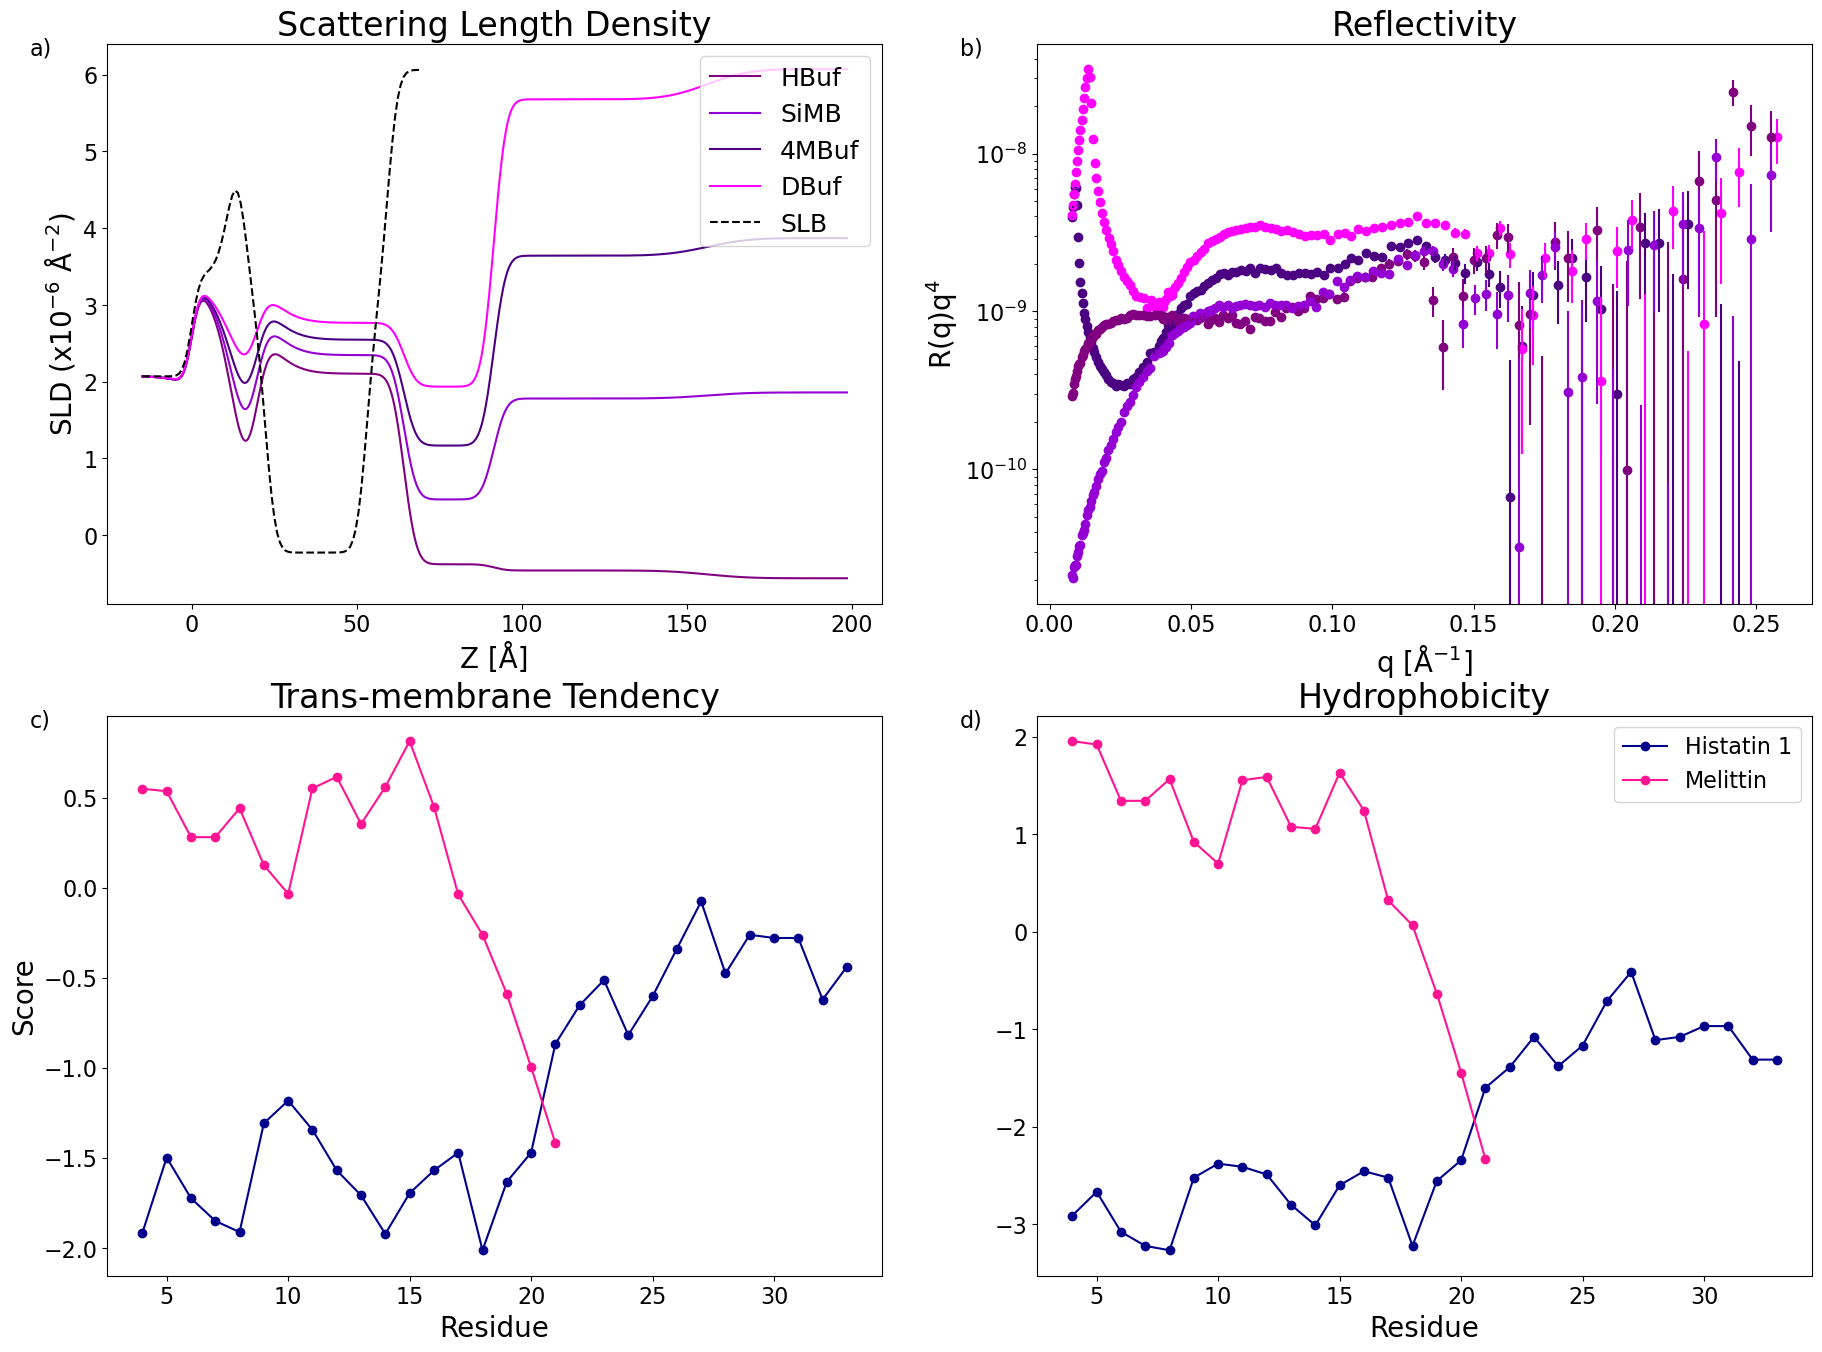

In [35]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(22, 16))
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/SLD_Test01_Hst1.dat'
a, b, c, d, e = np.genfromtxt(path, usecols=(0, 1, 2, 3, 4), unpack=True)
ax[0, 0].plot(a, b, color='purple')
ax[0, 0].plot(a, c, color='darkviolet')
ax[0, 0].plot(a, d, color='indigo')
ax[0, 0].plot(a, e, color='magenta')

ax[0, 1].set_yscale('log')
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/P4C_HST1_10_4MB.mft'
a, b, c, d = np.genfromtxt(path, usecols=(0, 1, 2, 3), unpack=True, skip_header=23)
ax[0, 1].scatter(a, (b*(a**4)), color='indigo')
ax[0, 1].errorbar(a, (b*(a**4)), yerr=c*(a**4), color='indigo', linestyle='none')
ax[0, 1].set_yscale('log')
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/P4C_HST1_10_Dbuf.mft'
a, b, c, d = np.genfromtxt(path, usecols=(0, 1, 2, 3), unpack=True, skip_header=23)
ax[0, 1].scatter(a, (b*(a**4)), color='magenta')
ax[0, 1].errorbar(a, (b*(a**4)), yerr=c*(a**4), color='magenta', linestyle='none')
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/P4C_Hst1_10_Hbuf.mft'
a, b, c, d = np.genfromtxt(path, usecols=(0, 1, 2, 3), unpack=True, skip_header=23)
ax[0, 1].scatter(a, (b*(a**4)), color='purple')
ax[0, 1].errorbar(a, (b*(a**4)), yerr=c*(a**4), color='purple', linestyle='none')
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/P4C_Hst1_10_SiMB.mft'
a, b, c, d = np.genfromtxt(path, usecols=(0, 1, 2, 3), unpack=True, skip_header=23)
ax[0, 1].scatter(a, (b*(a**4)), color='darkviolet')
ax[0, 1].errorbar(a, (b*(a**4)), yerr=c*(a**4), color='darkviolet', linestyle='none')

path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/EXPA_Hst1'
a, b = np.genfromtxt(path, usecols=(1, 3), unpack=True, skip_header=12)
ax[1, 0].plot(a, b, color='darkblue', marker='o')
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/EXPA_Mel'
a, b = np.genfromtxt(path, usecols=(1, 3), unpack=True, skip_header=12)
ax[1, 0].plot(a, b, color='deeppink', marker='o')
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/Hydo_Hst1'
a, b = np.genfromtxt(path, usecols=(1, 3), unpack=True, skip_header=12)
ax[1, 1].plot(a, b, color='darkblue', marker='o')
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/Hydo_Mel'
a, b = np.genfromtxt(path, usecols=(1, 3), unpack=True, skip_header=12)
ax[1, 1].plot(a, b, color='deeppink', marker='o')

ax[0, 0].set_ylabel('SLD (x$10^{-6}$ Å$^{-2}$)', fontsize=20)
ax[0, 1].set_ylabel('R(q)q$^{4}$', fontsize=20)
ax[0, 0].set_xlabel('Z [Å]', fontsize=20)
ax[0, 1].set_xlabel('q [Å$^{-1}$]', fontsize=20)
ax[1, 0].set_xlabel('Residue', fontsize=20)
ax[1, 0].set_ylabel('Score', fontsize=20)
ax[1, 1].set_xlabel('Residue', fontsize=20)
ax[1, 1].legend(['Histatin 1', 'Melittin'], fontsize=16)
ax[0, 0].set_title('Scattering Length Density', fontsize=24)
ax[0, 1].set_title('Reflectivity', fontsize=24)
ax[1, 0].set_title('Trans-membrane Tendency', fontsize=24)
ax[1, 1].set_title('Hydrophobicity', fontsize=24)
ax[0, 0].tick_params(labelsize=16)
ax[0, 1].tick_params(labelsize=16)
ax[1, 0].tick_params(labelsize=16)
ax[1, 1].tick_params(labelsize=16)
ax[0, 0].text(-0.1,0.98,"a)",fontsize=16,transform=ax[0, 0].transAxes)
ax[0, 1].text(-0.1,0.98,"b)",fontsize=16,transform=ax[0, 1].transAxes)
ax[1, 0].text(-0.1,0.98,"c)",fontsize=16,transform=ax[1, 0].transAxes)
ax[1, 1].text(-0.1,0.98,"d)",fontsize=16,transform=ax[1, 1].transAxes)

path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/SLD_P4C_PCPS_SLB.dat'
a, b, c, d, e, f = np.genfromtxt(path, usecols=(0, 1, 2, 3, 4, 5), unpack=True)
ax[0, 0].plot(a[0:100], c[0:100], color='black', linestyle='--')
ax[0, 0].legend(['HBuf', 'SiMB', '4MBuf', 'DBuf', 'SLB'], fontsize=18, loc='upper right')

plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/SLD', bbox_inches='tight')

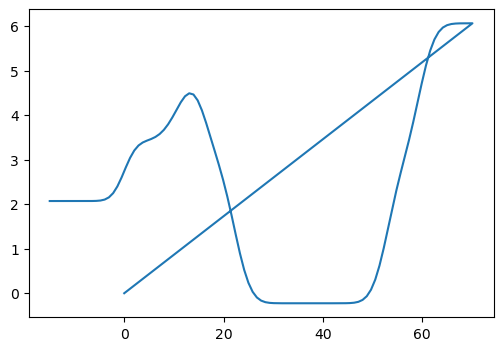

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 4))
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/SLD_P4C_PCPS_SLB.dat'
a, b, c, d, e, f = np.genfromtxt(path, usecols=(0, 1, 2, 3, 4, 5), unpack=True)
ax.plot(a, c)

## Self-asso

In [17]:
def pddf_load(file_path):
    with open(file_path) as PDDF:
        lines = PDDF.readlines()
        counter = 0
        for line in lines:
            if line == ref:
                start = counter + 2
            counter += 1
    PDDF.close()
    r, P = np.genfromtxt(file_path, skip_header=start, unpack=True, usecols=(0, 1))
    return r, P

0.105483
2.06559444
1.011924221375
1.0791458106


/var/folders/5p/n17l_b1j1blc40n8pdg8y9bh0000gn/T/ipykernel_1530/2229366124.py:33: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  print(np.trapz(P_e, r_e)*6250)
/var/folders/5p/n17l_b1j1blc40n8pdg8y9bh0000gn/T/ipykernel_1530/2229366124.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  print(np.trapz(P_e, r_e)*195)


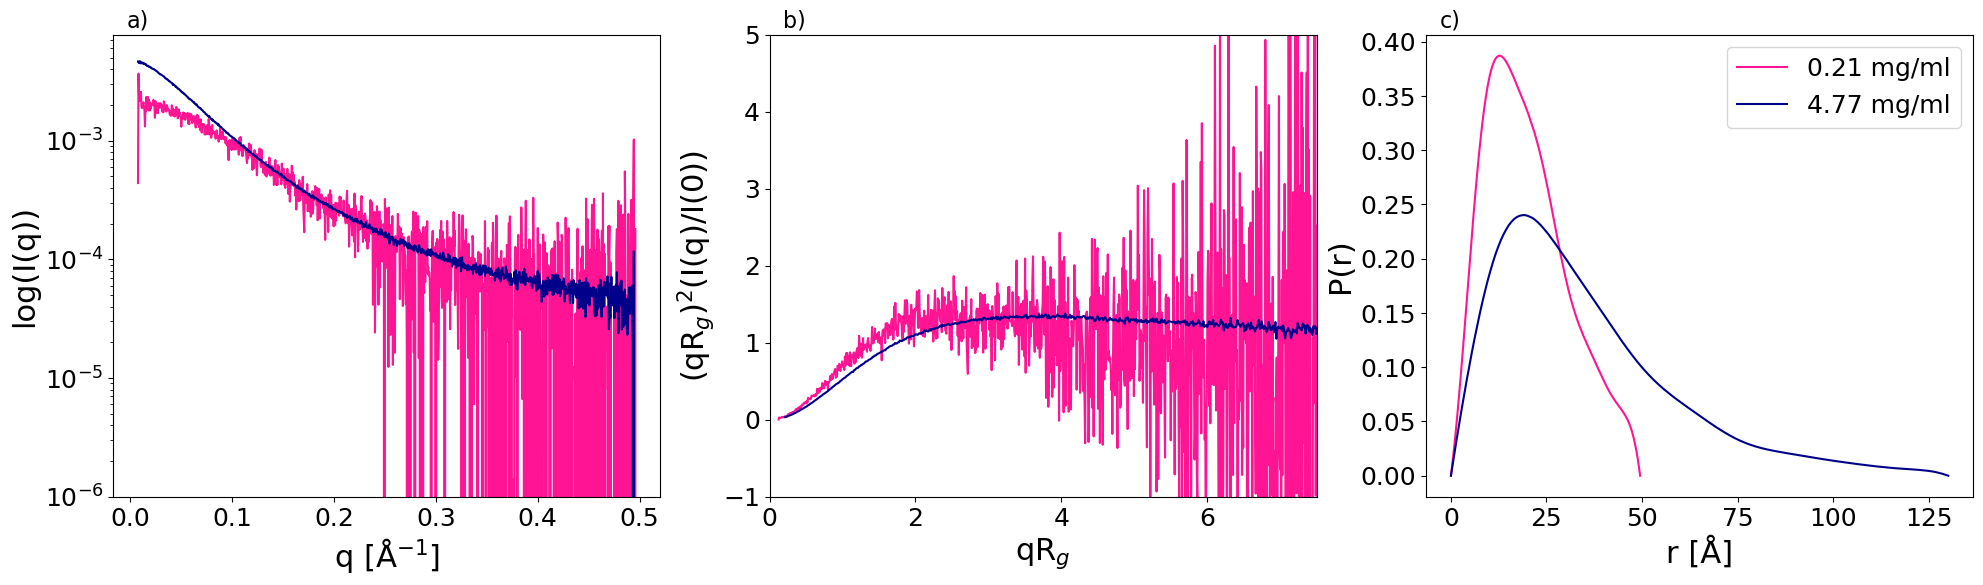

In [45]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(24, 6))
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/SAXS_data_Jan_2025_Grenoble/Hst1_HS/Hst1_HS_pro/0p21.dat'
q_e, I_1 = np.genfromtxt(path, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=9)
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/SAXS_data_Jan_2025_Grenoble/Hst1_HS/Hst1_HS_pro/4p77.dat'
q_e, I_2 = np.genfromtxt(path, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=9)

q_e = q_e/10
print(q_e[200])
coeff = 1/(I_2[200]/I_1[200])
I_2 = I_2*coeff
ax[0].plot(q_e, I_1, color='deeppink')
ax[0].plot(q_e, I_2, color='darkblue')

I0_e1 = 0.0021
Rg_e1 = 15.9
q1 = q_e*Rg_e1
I1 = ((q_e*Rg_e1)**2)*(I_1/I0_e1)

I0_e2 = 0.068
Rg_e2 = 27.3
q2 = q_e*Rg_e2
I2 = ((q_e*Rg_e2)**2)*(I_2/I0_e2)

print(q1[250])
coeff = 1/(I2[250]/I1[250])
I2 = I2*coeff

ax[1].plot(q1, I1, color='deeppink')
ax[1].plot(q2, I2, color='darkblue')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/SAXS_data_Jan_2025_Grenoble/Hst1_HS/Hst1_HS_pro/0p21.out'
r_e, P_e = pddf_load(file)
print(np.trapz(P_e, r_e)*6250)
ax[2].plot((r_e*10), (P_e*6250), color='deeppink')
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/SAXS_data_Jan_2025_Grenoble/Hst1_HS/Hst1_HS_pro/4p77.out'
r_e, P_e = pddf_load(file)
print(np.trapz(P_e, r_e)*195)
ax[2].plot((r_e*10), (P_e*195), color='darkblue')

ax[0].set_yscale('log')
ax[0].set_ylim(10**-6)
ax[1].set_ylim(10**-6)
ax[1].set_xlim(0, 7.5)
ax[1].set_ylim(-1, 5)
ax[0].set_xlabel('q [Å$^{-1}$]', fontsize=22)
ax[1].set_xlabel('qR$_{g}$', fontsize=22)
ax[2].set_xlabel('r [Å]', fontsize=22)
ax[0].set_ylabel('log(I(q))', fontsize=22)
ax[1].set_ylabel('(qR$_{g}$)$^2$(I(q)/I(0))', fontsize=22)
ax[2].set_ylabel('P(r)', fontsize=22)
ax[0].text(0.025,1.015,"a)",fontsize=16,transform=ax[0].transAxes)
ax[1].text(0.025,1.015,"b)",fontsize=16,transform=ax[1].transAxes)
ax[2].text(0.025,1.015,"c)",fontsize=16,transform=ax[2].transAxes)
ax[0].tick_params(labelsize=18)
ax[1].tick_params(labelsize=18)
ax[2].tick_params(labelsize=18)
ax[2].legend(['0.21 mg/ml', '4.77 mg/ml'], fontsize=18)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/SAXS_associ', bbox_inches='tight')

## Convergence

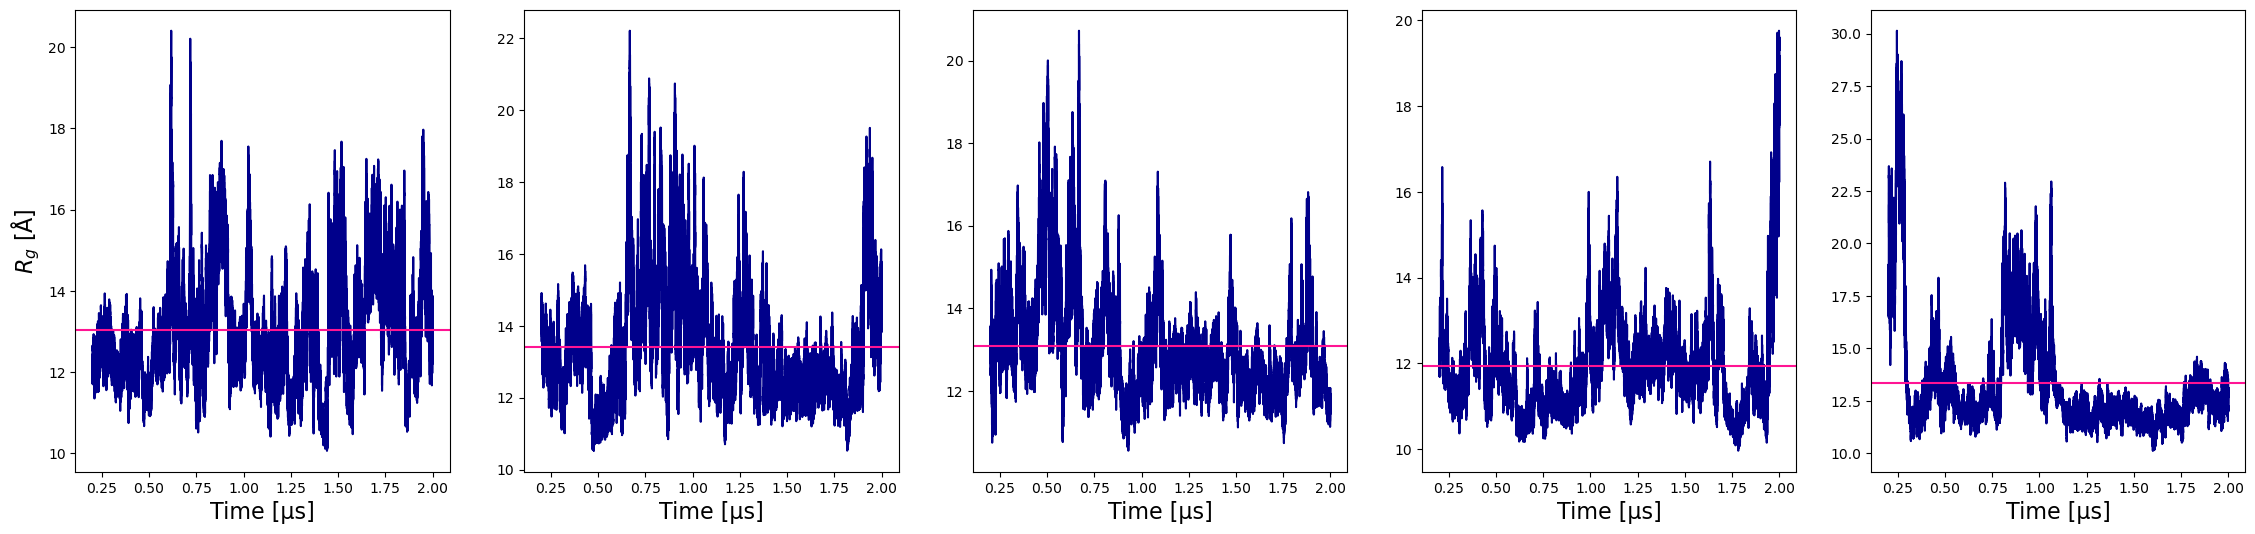

In [189]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(28, 6))
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/cut1_rg.xvg'
t, r = np.genfromtxt(file, skip_header=27, usecols=(0, 1), unpack=True)
r = r*10
ax[0].plot(t*(10**-6), r, color='darkblue')
ax[0].axhline(y=(sum(r)/len(r)), color='deeppink')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/cut2_rg.xvg'
t, r = np.genfromtxt(file, skip_header=27, usecols=(0, 1), unpack=True)
r = r*10
ax[1].plot(t*(10**-6), r, color='darkblue')
ax[1].axhline(y=(sum(r)/len(r)), color='deeppink')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/cut3_rg.xvg'
t, r = np.genfromtxt(file, skip_header=27, usecols=(0, 1), unpack=True)
r = r*10
ax[2].plot(t*(10**-6), r, color='darkblue')
ax[2].axhline(y=(sum(r)/len(r)), color='deeppink')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/cut4_rg.xvg'
t, r = np.genfromtxt(file, skip_header=27, usecols=(0, 1), unpack=True)
r = r*10
ax[3].plot(t*(10**-6), r, color='darkblue')
ax[3].axhline(y=(sum(r)/len(r)), color='deeppink')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/cut5_rg.xvg'
t, r = np.genfromtxt(file, skip_header=27, usecols=(0, 1), unpack=True)
r = r*10
ax[4].plot(t*(10**-6), r, color='darkblue')
ax[4].axhline(y=(sum(r)/len(r)), color='deeppink')

ax[0].set_ylabel('$R_{g}$ [Å]', fontsize=16)
ax[0].set_xlabel('Time [μs]', fontsize=16)
ax[1].set_xlabel('Time [μs]', fontsize=16)
ax[2].set_xlabel('Time [μs]', fontsize=16)
ax[3].set_xlabel('Time [μs]', fontsize=16)
ax[4].set_xlabel('Time [μs]', fontsize=16)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/Phospo_con.png', bbox_inches='tight')

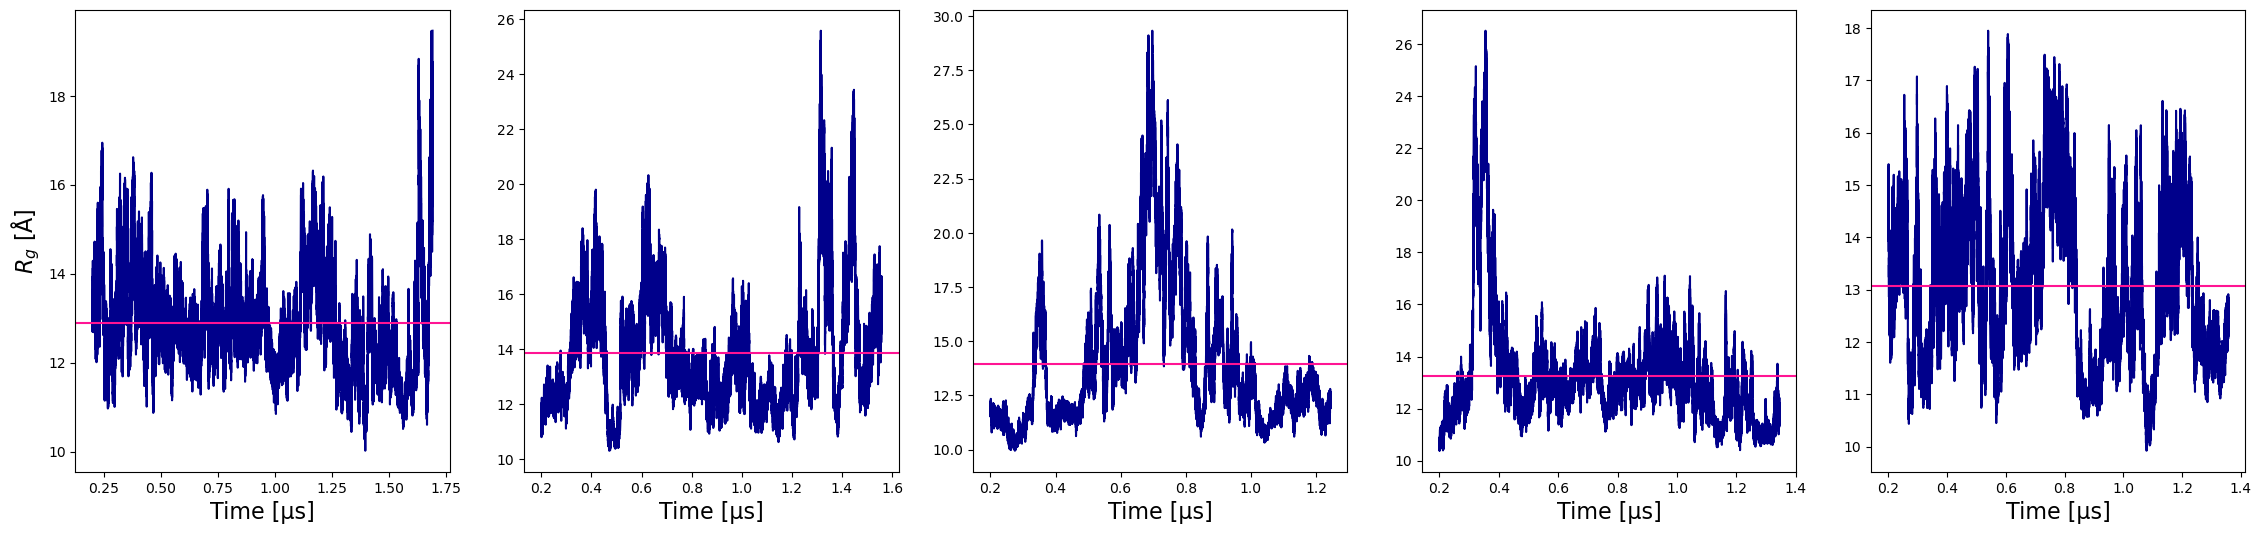

In [190]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(28, 6))
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/non-phospo/analysis/cut1_rg.xvg'
t, r = np.genfromtxt(file, skip_header=27, usecols=(0, 1), unpack=True)
r = r*10
ax[0].plot(t*(10**-6), r, color='darkblue')
ax[0].axhline(y=(sum(r)/len(r)), color='deeppink')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/non-phospo/analysis/cut2_rg.xvg'
t, r = np.genfromtxt(file, skip_header=27, usecols=(0, 1), unpack=True)
r = r*10
ax[1].plot(t*(10**-6), r, color='darkblue')
ax[1].axhline(y=(sum(r)/len(r)), color='deeppink')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/non-phospo/analysis/cut3_rg.xvg'
t, r = np.genfromtxt(file, skip_header=27, usecols=(0, 1), unpack=True)
r = r*10
ax[2].plot(t*(10**-6), r, color='darkblue')
ax[2].axhline(y=(sum(r)/len(r)), color='deeppink')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/non-phospo/analysis/cut4_rg.xvg'
t, r = np.genfromtxt(file, skip_header=27, usecols=(0, 1), unpack=True)
r = r*10
ax[3].plot(t*(10**-6), r, color='darkblue')
ax[3].axhline(y=(sum(r)/len(r)), color='deeppink')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/non-phospo/analysis/cut5_rg.xvg'
t, r = np.genfromtxt(file, skip_header=27, usecols=(0, 1), unpack=True)
r = r*10
ax[4].plot(t*(10**-6), r, color='darkblue')
ax[4].axhline(y=(sum(r)/len(r)), color='deeppink')

ax[0].set_ylabel('$R_{g}$ [Å]', fontsize=16)
ax[0].set_xlabel('Time [μs]', fontsize=16)
ax[1].set_xlabel('Time [μs]', fontsize=16)
ax[2].set_xlabel('Time [μs]', fontsize=16)
ax[3].set_xlabel('Time [μs]', fontsize=16)
ax[4].set_xlabel('Time [μs]', fontsize=16)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/Non-Phospo_con.png', bbox_inches='tight')

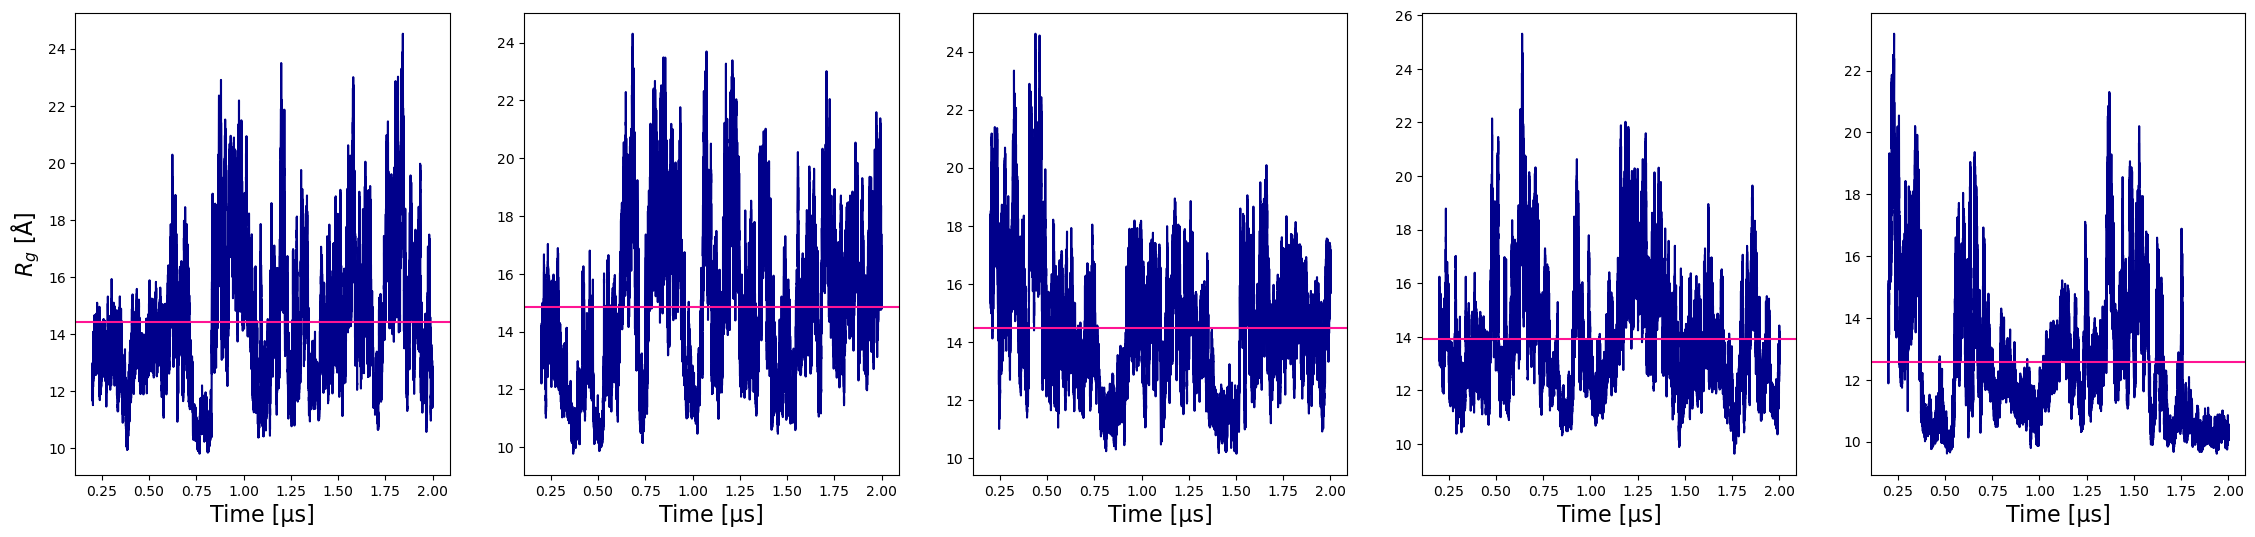

In [191]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(28, 6))
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst3/cut1_rg.xvg'
t, r = np.genfromtxt(file, skip_header=27, usecols=(0, 1), unpack=True)
r = r*10
ax[0].plot(t*(10**-6), r, color='darkblue')
ax[0].axhline(y=(sum(r)/len(r)), color='deeppink')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst3/cut2_rg.xvg'
t, r = np.genfromtxt(file, skip_header=27, usecols=(0, 1), unpack=True)
r = r*10
ax[1].plot(t*(10**-6), r, color='darkblue')
ax[1].axhline(y=(sum(r)/len(r)), color='deeppink')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst3/cut3_rg.xvg'
t, r = np.genfromtxt(file, skip_header=27, usecols=(0, 1), unpack=True)
r = r*10
ax[2].plot(t*(10**-6), r, color='darkblue')
ax[2].axhline(y=(sum(r)/len(r)), color='deeppink')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst3/cut4_rg.xvg'
t, r = np.genfromtxt(file, skip_header=27, usecols=(0, 1), unpack=True)
r = r*10
ax[3].plot(t*(10**-6), r, color='darkblue')
ax[3].axhline(y=(sum(r)/len(r)), color='deeppink')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst3/cut5_rg.xvg'
t, r = np.genfromtxt(file, skip_header=27, usecols=(0, 1), unpack=True)
r = r*10
ax[4].plot(t*(10**-6), r, color='darkblue')
ax[4].axhline(y=(sum(r)/len(r)), color='deeppink')

ax[0].set_ylabel('$R_{g}$ [Å]', fontsize=16)
ax[0].set_xlabel('Time [μs]', fontsize=16)
ax[1].set_xlabel('Time [μs]', fontsize=16)
ax[2].set_xlabel('Time [μs]', fontsize=16)
ax[3].set_xlabel('Time [μs]', fontsize=16)
ax[4].set_xlabel('Time [μs]', fontsize=16)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/Hst3_con.png', bbox_inches='tight')

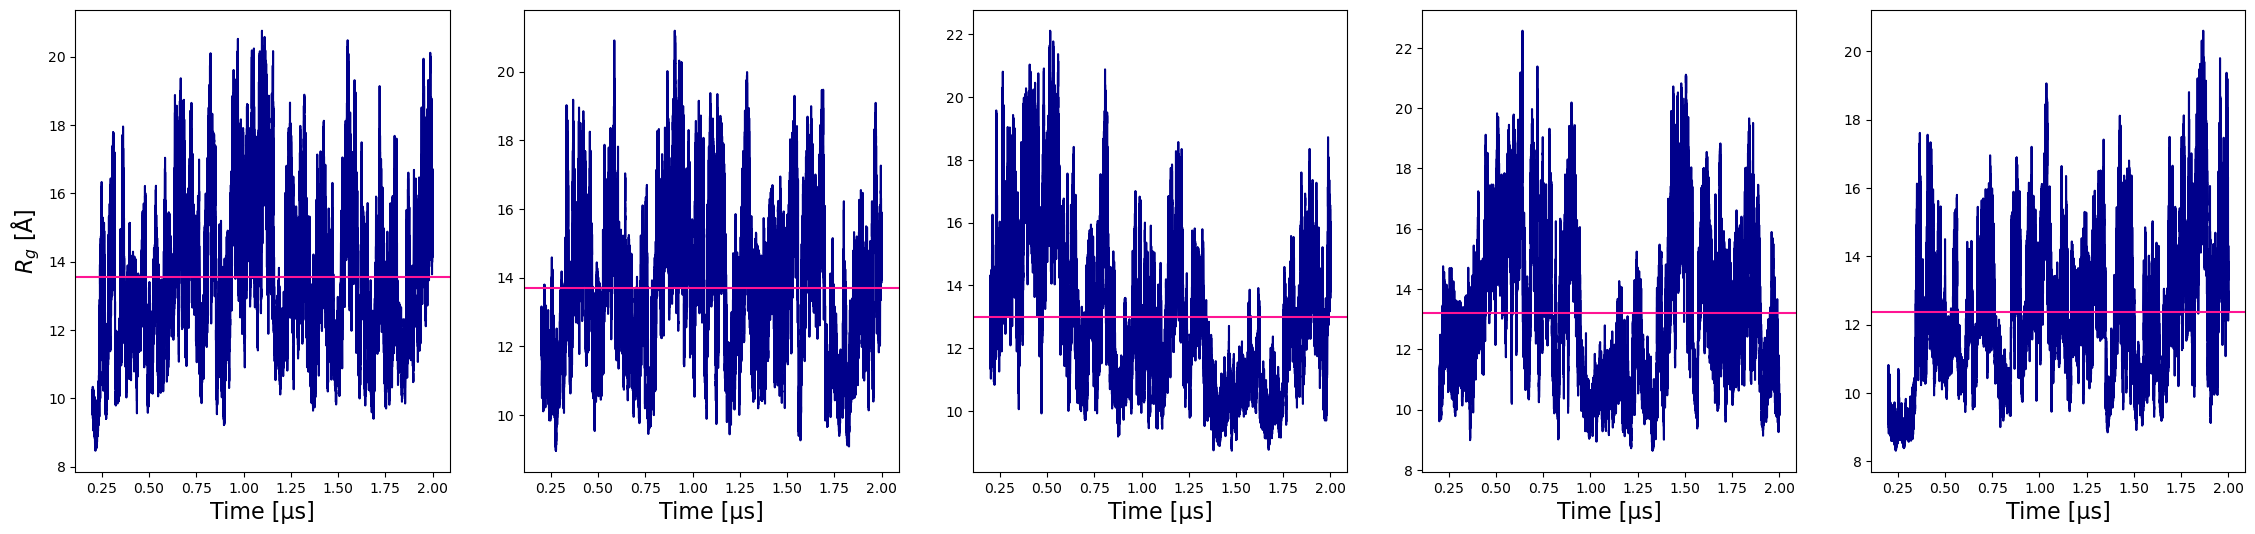

In [192]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(28, 6))
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst5/cut1_rg.xvg'
t, r = np.genfromtxt(file, skip_header=27, usecols=(0, 1), unpack=True)
r = r*10
ax[0].plot(t*(10**-6), r, color='darkblue')
ax[0].axhline(y=(sum(r)/len(r)), color='deeppink')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst5/cut2_rg.xvg'
t, r = np.genfromtxt(file, skip_header=27, usecols=(0, 1), unpack=True)
r = r*10
ax[1].plot(t*(10**-6), r, color='darkblue')
ax[1].axhline(y=(sum(r)/len(r)), color='deeppink')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst5/cut3_rg.xvg'
t, r = np.genfromtxt(file, skip_header=27, usecols=(0, 1), unpack=True)
r = r*10
ax[2].plot(t*(10**-6), r, color='darkblue')
ax[2].axhline(y=(sum(r)/len(r)), color='deeppink')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst5/cut4_rg.xvg'
t, r = np.genfromtxt(file, skip_header=27, usecols=(0, 1), unpack=True)
r = r*10
ax[3].plot(t*(10**-6), r, color='darkblue')
ax[3].axhline(y=(sum(r)/len(r)), color='deeppink')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/Hsts/Hst5/cut5_rg.xvg'
t, r = np.genfromtxt(file, skip_header=27, usecols=(0, 1), unpack=True)
r = r*10
ax[4].plot(t*(10**-6), r, color='darkblue')
ax[4].axhline(y=(sum(r)/len(r)), color='deeppink')

ax[0].set_ylabel('$R_{g}$ [Å]', fontsize=16)
ax[0].set_xlabel('Time [μs]', fontsize=16)
ax[1].set_xlabel('Time [μs]', fontsize=16)
ax[2].set_xlabel('Time [μs]', fontsize=16)
ax[3].set_xlabel('Time [μs]', fontsize=16)
ax[4].set_xlabel('Time [μs]', fontsize=16)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/Hst5_con.png', bbox_inches='tight')

## Decomposition description

In [94]:
Ree, Rg = np.genfromtxt((path + 'CoE/polystat.xvg'), skip_header=28, usecols=(1, 2), unpack=True)
SASA = np.genfromtxt((path + 'CoE/sasa.xvg'), skip_header=24, usecols=(1), unpack=True)
Rg = Rg*10
Ree = Ree*10
Rg_ave = sum(Rg)/len(Rg)
Ree_ave = sum(Ree)/len(Ree)
SASA_ave = sum(SASA)/len(SASA)
RgC, ReC, SAC = contour_plotter(Rg, Ree, SASA)

In [95]:
conf_param = []
alfa = 1
for rg, re, sa in zip(Rg, Ree, SASA):
    conf = ((rg/Rg_ave) + (re/Ree_ave) + (sa/SASA_ave))*alfa
    conf_param.append(int(conf))
int_decomp(conf_param, (path + '/CoE'))

Please input filename


 a1


In [193]:
conf_param = []
alfa = 5
for rg, re, sa in zip(Rg, Ree, SASA):
    conf = ((rg/Rg_ave) + (re/Ree_ave) + (sa/SASA_ave))*alfa
    conf_param.append(int(conf))
int_decomp(conf_param, (path + '/CoE'))

conf_param = []
alfa = 10
for rg, re, sa in zip(Rg, Ree, SASA):
    conf = ((rg/Rg_ave) + (re/Ree_ave) + (sa/SASA_ave))*alfa
    conf_param.append(int(conf))
int_decomp(conf_param, (path + '/CoE'))
conf_param = []

alfa = 20
for rg, re, sa in zip(Rg, Ree, SASA):
    conf = ((rg/Rg_ave) + (re/Ree_ave) + (sa/SASA_ave))*alfa
    conf_param.append(int(conf))
int_decomp(conf_param, (path + '/CoE'))

Please input filename


 a5


Please input filename


 a10


Please input filename


 a20


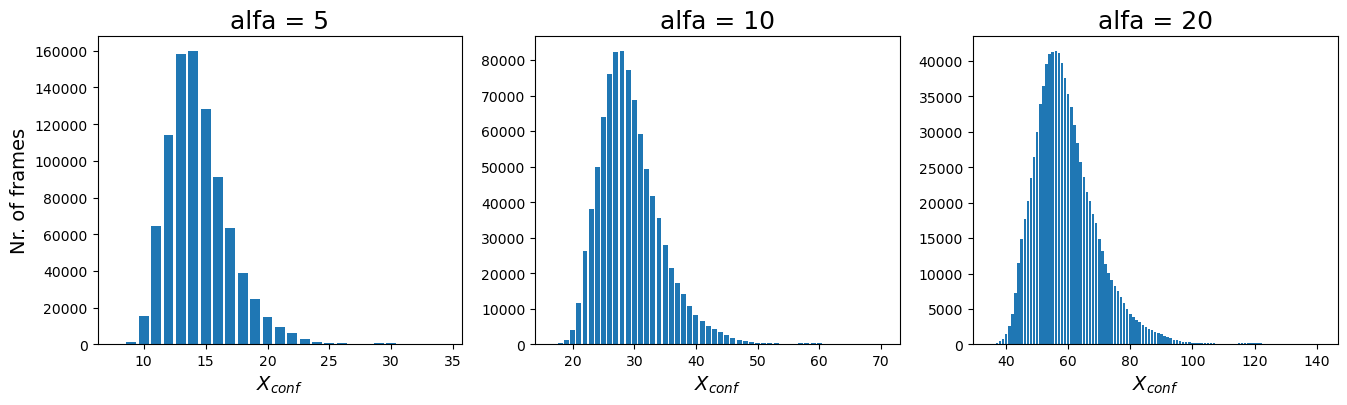

In [203]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))
grp, dst = np.genfromtxt((path + 'CoE/a5_dist.dat'), usecols=(0, 1), unpack=True)
ax[0].bar(grp, dst)
grp, dst = np.genfromtxt((path + 'CoE/a10_dist.dat'), usecols=(0, 1), unpack=True)
ax[1].bar(grp, dst)
grp, dst = np.genfromtxt((path + 'CoE/a20_dist.dat'), usecols=(0, 1), unpack=True)
ax[2].bar(grp, dst)

ax[0].set_xlabel('$X_{conf}$', fontsize=14)
ax[1].set_xlabel('$X_{conf}$', fontsize=14)
ax[2].set_xlabel('$X_{conf}$', fontsize=14)
ax[0].set_title('alfa = 5', fontsize=18)
ax[1].set_title('alfa = 10', fontsize=18)
ax[2].set_title('alfa = 20', fontsize=18)
ax[0].set_ylabel('Nr. of frames', fontsize=14)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/alfa.png', bbox_inches='tight')

In [127]:
conf_param = []
alfa = 5
for rg, re, sa in zip(Rg, Ree, SASA):
    conf = ((rg/Rg_ave) + (re/Ree_ave) + (sa/SASA_ave))*alfa
    conf_param.append(int(conf))
int_decomp(conf_param, (path + '/CoE'))

Please input filename


 conf_param


In [5]:
grp, dst = np.genfromtxt((path + 'CoE/conf_param_dist.dat'), usecols=(0, 1), unpack=True)

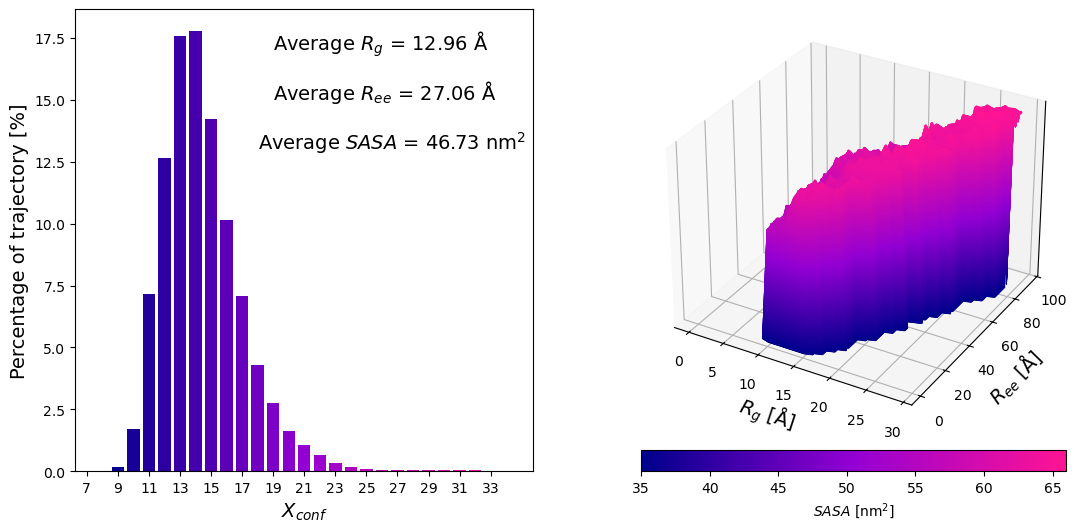

In [9]:
fig, ax = plt.subplot_mosaic('AB', per_subplot_kw={('B'): {'projection': '3d'}}, figsize=(13, 6))
counter = 0
for (g, d) in zip(grp, dst):
    ax['A'].bar(g, ((d/sum(dst))*100), color=color_list[counter])
    counter += 1
ax['B'].contour(RgC, ReC, SAC, levels=1000, cmap=cmap)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(35, 66), cmap=cmap),
                    ax=ax['B'], orientation='horizontal', label='$SASA$ [nm$^{2}$]', fraction=0.046, pad=0.04)

ax['A'].set_ylabel('Percentage of trajectory [%]', fontsize=14)
ax['A'].set_xlabel('$X_{conf}$', fontsize=14)
ax['A'].set_xticks(range(7, 35, 2))
ax['B'].set_zticks([])
ax['B'].set_ylabel('$R_{ee}$ [Å]', fontsize=14)
ax['B'].set_xlabel('$R_{g}$ [Å]', fontsize=14)
ax['A'].text(19, 17, ('Average $R_{g}$ = ' + str(Rg_ave)[0:5] + ' Å'), fontsize=14)
ax['A'].text(19, 15, ('Average $R_{ee}$ = ' + str(Ree_ave)[0:5] + ' Å'), fontsize=14)
ax['A'].text(18, 13, ('Average $SASA$ = ' + str(SASA_ave)[0:5] + ' nm$^2$'), fontsize=14)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/decomp.png', bbox_inches='tight')

## Alpha

In [78]:
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/persist/A20/'
top = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/protein_1.gro'
for nr in range(0, 107, 1):
    u = mda.Universe(top, (path + str(nr) + '.xtc'))
    backbone = u.select_atoms('name CA')

In [79]:
print(backbone)

<AtomGroup [<Atom 5: CA of type C of resname ASP, resid 1 and segid SYSTEM>, <Atom 17: CA of type C of resname S1P, resid 2 and segid SYSTEM>, <Atom 32: CA of type C of resname HISE, resid 3 and segid SYSTEM>, ..., <Atom 604: CA of type C of resname TYR, resid 36 and segid SYSTEM>, <Atom 625: CA of type C of resname ASP, resid 37 and segid SYSTEM>, <Atom 637: CA of type C of resname ASN, resid 38 and segid SYSTEM>]>


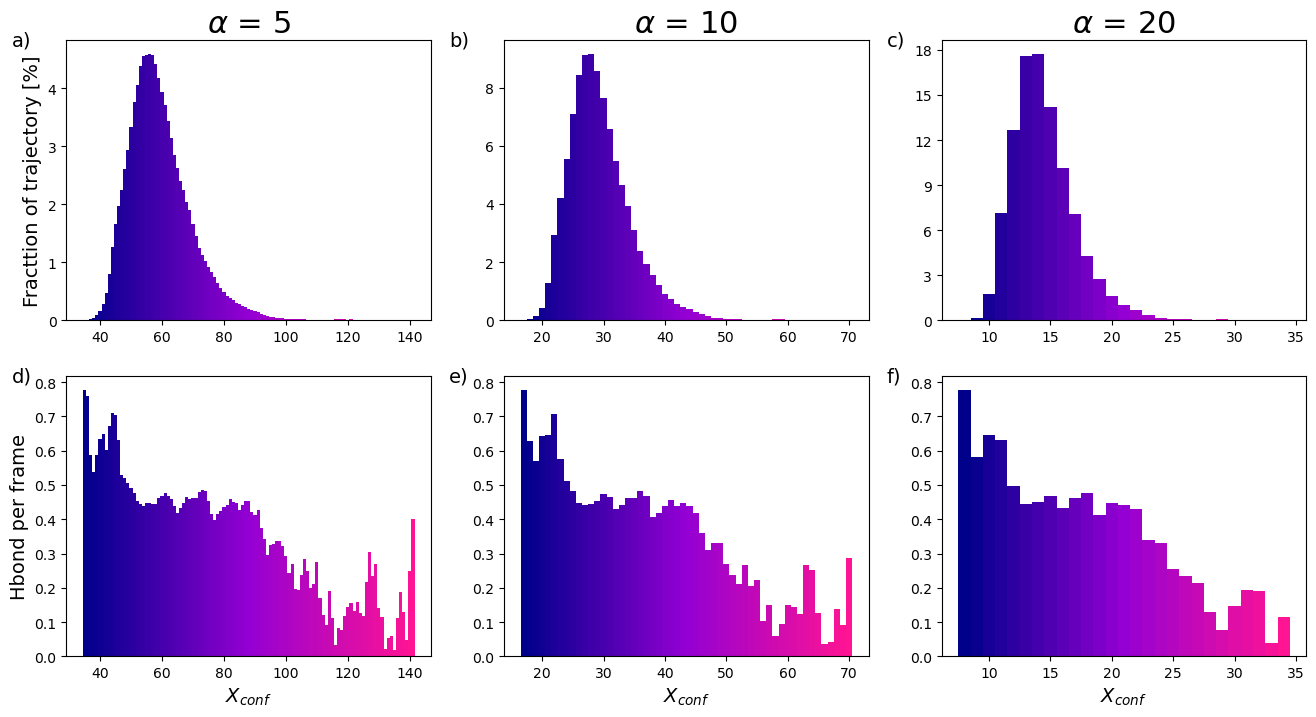

In [132]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/persist/'

grp, frm = np.genfromtxt((path + 'a20_dist.dat'), unpack=True, usecols=(0, 1))
colors = ['darkblue', 'darkviolet', 'deeppink']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)
amount = 107
color_list = cmap(np.linspace(0, 1, amount))
per_ave = []
counter = 0
for (g, f) in zip(grp, frm):
    ax[0, 0].bar(g, ((f/sum(frm))*100), color=color_list[counter], width=1.0)
    per = np.genfromtxt((path + 'A20/' + str(counter) + '.xvg'), unpack=True, usecols=(1), skip_header=24)
    per_ave.append(sum(per/f))
    counter += 1
counter = 0
for (g, p) in zip(grp, per_ave):
    ax[1, 0].bar(g, p, color=color_list[counter], width=1.0)
    counter += 1

grp, frm = np.genfromtxt((path + 'a10_dist.dat'), unpack=True, usecols=(0, 1))
colors = ['darkblue', 'darkviolet', 'deeppink']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)
amount = 54
color_list = cmap(np.linspace(0, 1, amount))
per_ave = []
counter = 0
for (g, f) in zip(grp, frm):
    ax[0, 1].bar(g, ((f/sum(frm))*100), color=color_list[counter], width=1.0)
    per = np.genfromtxt((path + 'A10/' + str(counter) + '.xvg'), unpack=True, usecols=(1), skip_header=24)
    per_ave.append(sum(per/f))
    counter += 1
counter = 0
for (g, p) in zip(grp, per_ave):
    ax[1, 1].bar(g, p, color=color_list[counter], width=1.0)
    counter += 1

grp, frm = np.genfromtxt((path + 'a5_dist.dat'), unpack=True, usecols=(0, 1))
colors = ['darkblue', 'darkviolet', 'deeppink']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)
amount = 27
color_list = cmap(np.linspace(0, 1, amount))
per_ave = []
counter = 0
for (g, f) in zip(grp, frm):
    ax[0, 2].bar(g, ((f/sum(frm))*100), color=color_list[counter], width=1.0)
    per = np.genfromtxt((path + 'A5/' + str(counter) + '.xvg'), unpack=True, usecols=(1), skip_header=24)
    per_ave.append(sum(per/f))
    counter += 1
counter = 0
for (g, p) in zip(grp, per_ave):
    ax[1, 2].bar(g, p, color=color_list[counter], width=1.0)
    counter += 1

ax[0, 2].set_yticks(range(0, 19, 3))
ax[1, 0].set_xlabel('$X_{conf}$', fontsize=14)
ax[1, 1].set_xlabel('$X_{conf}$', fontsize=14)
ax[1, 2].set_xlabel('$X_{conf}$', fontsize=14)
ax[1, 0].set_xlabel('$X_{conf}$', fontsize=14)
ax[0, 0].set_ylabel('Fracttion of trajectory [%]', fontsize=14)
ax[1, 0].set_ylabel('Hbond per frame', fontsize=14)
ax[0, 0].set_title('$α$ = 5', fontsize=22)
ax[0, 1].set_title('$α$ = 10', fontsize=22)
ax[0, 2].set_title('$α$ = 20', fontsize=22)

ax[0, 0].text(-0.15,0.98,"a)",fontsize=14,transform=ax[0, 0].transAxes)
ax[0, 1].text(-0.15,0.98,"b)",fontsize=14,transform=ax[0, 1].transAxes)
ax[0, 2].text(-0.15,0.98,"c)",fontsize=14,transform=ax[0, 2].transAxes)
ax[1, 0].text(-0.15,0.98,"d)",fontsize=14,transform=ax[1, 0].transAxes)
ax[1, 1].text(-0.15,0.98,"e)",fontsize=14,transform=ax[1, 1].transAxes)
ax[1, 2].text(-0.15,0.98,"f)",fontsize=14,transform=ax[1, 2].transAxes)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/Alpha_comp', bbox_inches='tight')

## Not used

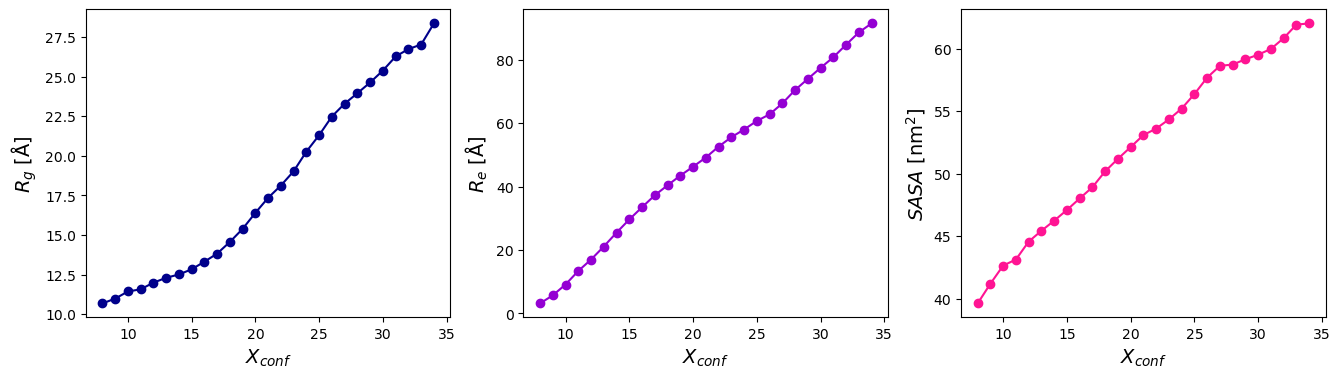

In [4]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))
grp = np.genfromtxt((path + 'CoE/conf_param_dist.dat'), usecols=(0), unpack=True)
Rg_conf = []
Ree_conf = []
SASA_conf = []
counter = 0
while counter <= 26:
    Ree, Rg = np.genfromtxt((path + 'CoE/polystat_' + str(counter) + '.svg.xvg'), skip_header=28, usecols=(1, 2), unpack=True)
    SASA = np.genfromtxt((path + 'CoE/sasa_' + str(counter) + '.svg.xvg'), skip_header=24, usecols=(1), unpack=True)
    Rg_conf.append((sum(Rg)/len(Rg))*10)
    Ree_conf.append((sum(Ree)/len(Ree))*10)
    SASA_conf.append(sum(SASA)/len(SASA))
    counter += 1

ax[0].plot(grp, Rg_conf, marker='o', color='darkblue')
ax[1].plot(grp, Ree_conf, marker='o', color='darkviolet')
ax[2].plot(grp, SASA_conf, marker='o', color='deeppink')

ax[0].set_xlabel('$X_{conf}$', fontsize=14)
ax[1].set_xlabel('$X_{conf}$', fontsize=14)
ax[2].set_xlabel('$X_{conf}$', fontsize=14)
ax[0].set_ylabel('$R_{g}$ [Å]', fontsize=14)
ax[1].set_ylabel('$R_{e}$ [Å]', fontsize=14)
ax[2].set_ylabel('$SASA$ [nm$^{2}$]', fontsize=14)
#ax[0].text(-0.15,0.98,"a)",fontsize=18,transform=ax[0].transAxes)
#ax[1].text(-0.15,0.98,"b)",fontsize=18,transform=ax[1].transAxes)
#ax[2].text(-0.15,0.98,"c)",fontsize=18,transform=ax[2].transAxes)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/Rg_Ree_SASA.png', bbox_inches='tight')

## Secondary structure and circular dichroism

In [16]:
SS_array = np.zeros((27, 9))
SS_pro = []
counter = 0
while counter <= 26:
    with open (path + 'CoE/' + 'dssp_' + str(counter) + '.dat', 'r') as dssp_file: 
        DSSP = dssp_file.readlines()
        for line in DSSP:
            for letter in line:
                if letter == '~': # Loop
                    SS_array[counter, 0] += 1
                elif letter == 'T': # Turn
                    SS_array[counter, 1] += 1
                elif letter == 'S': # Bend
                    SS_array[counter, 2] += 1
                elif letter == 'P': # PPII-helix
                    SS_array[counter, 3] += 1
                elif letter == 'I': # Pi-helix
                    SS_array[counter, 4] += 1
                elif letter == 'G': # 3-10-helix
                    SS_array[counter, 5] += 1
                elif letter == 'E': # Beta-ladder
                    SS_array[counter, 6] += 1
                elif letter == 'B': # Beta-bridge
                    SS_array[counter, 7] += 1
                elif letter == 'H': #Alfa-helix
                    SS_array[counter, 8] += 1
        SS_pro.append((sum(SS_array[counter, 1:8])/sum(SS_array[counter]))*100)
    counter += 1

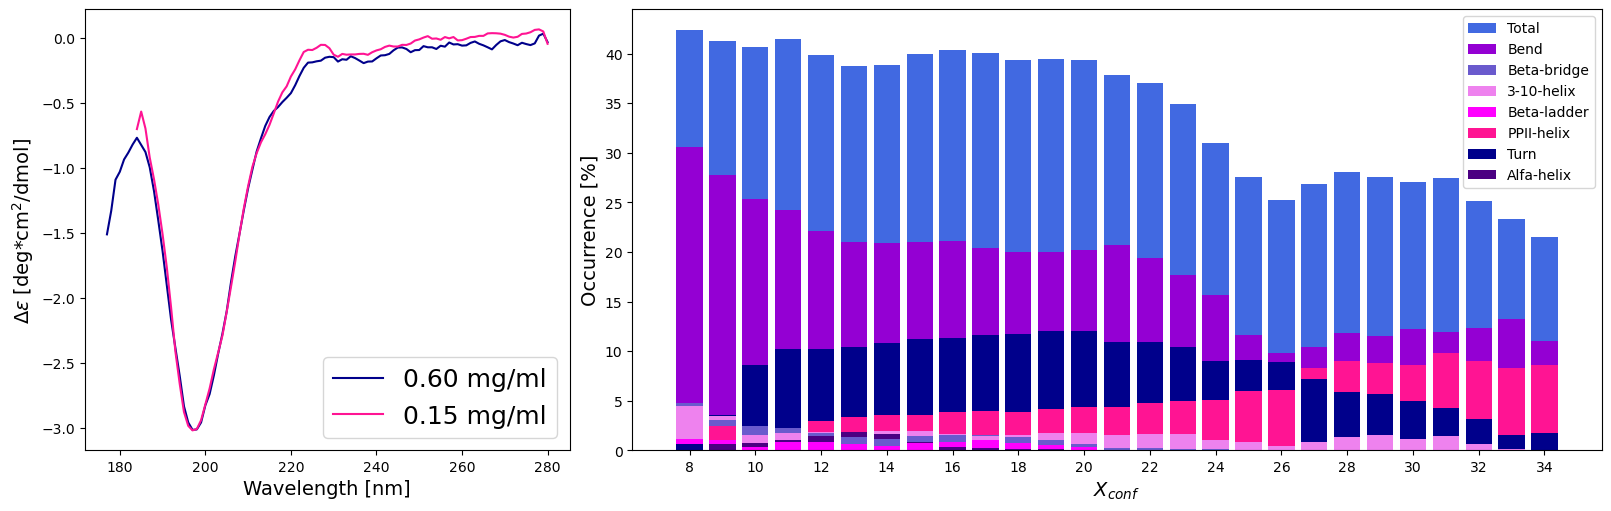

In [18]:
fig, ax = plt.subplot_mosaic([['right', 'left', 'left']], figsize=(16, 5), layout='constrained')
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/CD_Aarhus_Oct_2024/Hst1HS_0.6.dat'
w, s = np.genfromtxt(file, usecols=(0, 1), unpack=True)
ax['right'].plot(w, s, color='darkblue')
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/CD_Aarhus_Oct_2024/Hst1HS_0.15.dat'
w, s = np.genfromtxt(file, usecols=(0, 1), unpack=True)
ax['right'].plot(w, s, color='deeppink')
grp = np.genfromtxt((path + 'CoE/conf_param_dist.dat'), usecols=(0), unpack=True)
ax['left'].bar(grp, SS_pro, color='royalblue', label='Total')

legend = False
counter1 = 0
for array in SS_array:
    counter2 = 0
    temp = []
    for element in array:
        toup = (element, counter2)
        temp.append(toup)
        counter2 += 1
    temp.sort(reverse=True)
    for item in temp[1:8]:
        if item[1] == 1:
            ax['left'].bar(grp[counter1], (item[0]/sum(array))*100, label='Turn', color='darkblue')
        elif item[1] == 2:
            ax['left'].bar(grp[counter1], (item[0]/sum(array))*100, label='Bend', color='darkviolet')
        elif item[1] == 3:
            ax['left'].bar(grp[counter1], (item[0]/sum(array))*100, label='PPII-helix', color='deeppink')
            #print((item[0]/sum(array))*100)
        elif item[1] == 4:
            ax['left'].bar(grp[counter1], (item[0]/sum(array))*100, label='Pi-helix', color='blue')
        elif item[1] == 5:
            ax['left'].bar(grp[counter1], (item[0]/sum(array))*100, label='3-10-helix', color='violet')
        elif item[1] == 6:
            ax['left'].bar(grp[counter1], (item[0]/sum(array))*100, label='Beta-ladder', color='magenta')
        elif item[1] == 7:
            ax['left'].bar(grp[counter1], (item[0]/sum(array))*100, label='Beta-bridge', color='slateblue')
        elif item[1] == 8:
            ax['left'].bar(grp[counter1], (item[0]/sum(array))*100, label='Alfa-helix', color='indigo')
    if legend == False:
        ax['left'].legend(fontsize=10)
        legend = True
    counter1 += 1

ax['right'].legend(['0.60 mg/ml', '0.15 mg/ml'], fontsize=18, loc='lower right')
ax['left'].set_xticks(range(8, 35, 2))
ax['left'].set_xlabel('$X_{conf}$', fontsize=14)
ax['left'].set_ylabel('Occurrence [%]', fontsize=14)
ax['right'].set_xlabel('Wavelength [nm]', fontsize=14)
ax['right'].set_ylabel('$\Delta\epsilon$ [deg*cm$^{2}$/dmol]', fontsize=14)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/CD_DSSP.png', bbox_inches='tight')

## Intramolecular interactions

In [164]:
length = range(0, chain_length)
for a in length:
    hbond_set = []
    for aa in length:
        try:
            file = path + 'CoE/Hbond_20/' + 'Res' + str(a) + '/' + str(aa) + '.xvg' 
            hbond = np.genfromtxt(file, unpack=True, skip_header=24, usecols=(1))
            hbond_set.append(sum(hbond))
        except:
            hbond_set.append(0)
    print('Res' + str(a) + ': Finished')
    with open(path + 'CoE/Hbond_20/' + 'Res' + str(a) + '/out.dat', 'w') as file:
        for (l, h) in zip(length, hbond_set):
            file.write(str(l) + ' ' + str(h) + ' ' + '\n')

Res0: Finished
Res1: Finished
Res2: Finished
Res3: Finished
Res4: Finished
Res5: Finished
Res6: Finished
Res7: Finished
Res8: Finished
Res9: Finished
Res10: Finished
Res11: Finished
Res12: Finished
Res13: Finished
Res14: Finished
Res15: Finished
Res16: Finished
Res17: Finished
Res18: Finished
Res19: Finished
Res20: Finished
Res21: Finished
Res22: Finished
Res23: Finished
Res24: Finished
Res25: Finished
Res26: Finished
Res27: Finished
Res28: Finished
Res29: Finished
Res30: Finished
Res31: Finished
Res32: Finished
Res33: Finished
Res34: Finished
Res35: Finished
Res36: Finished
Res37: Finished


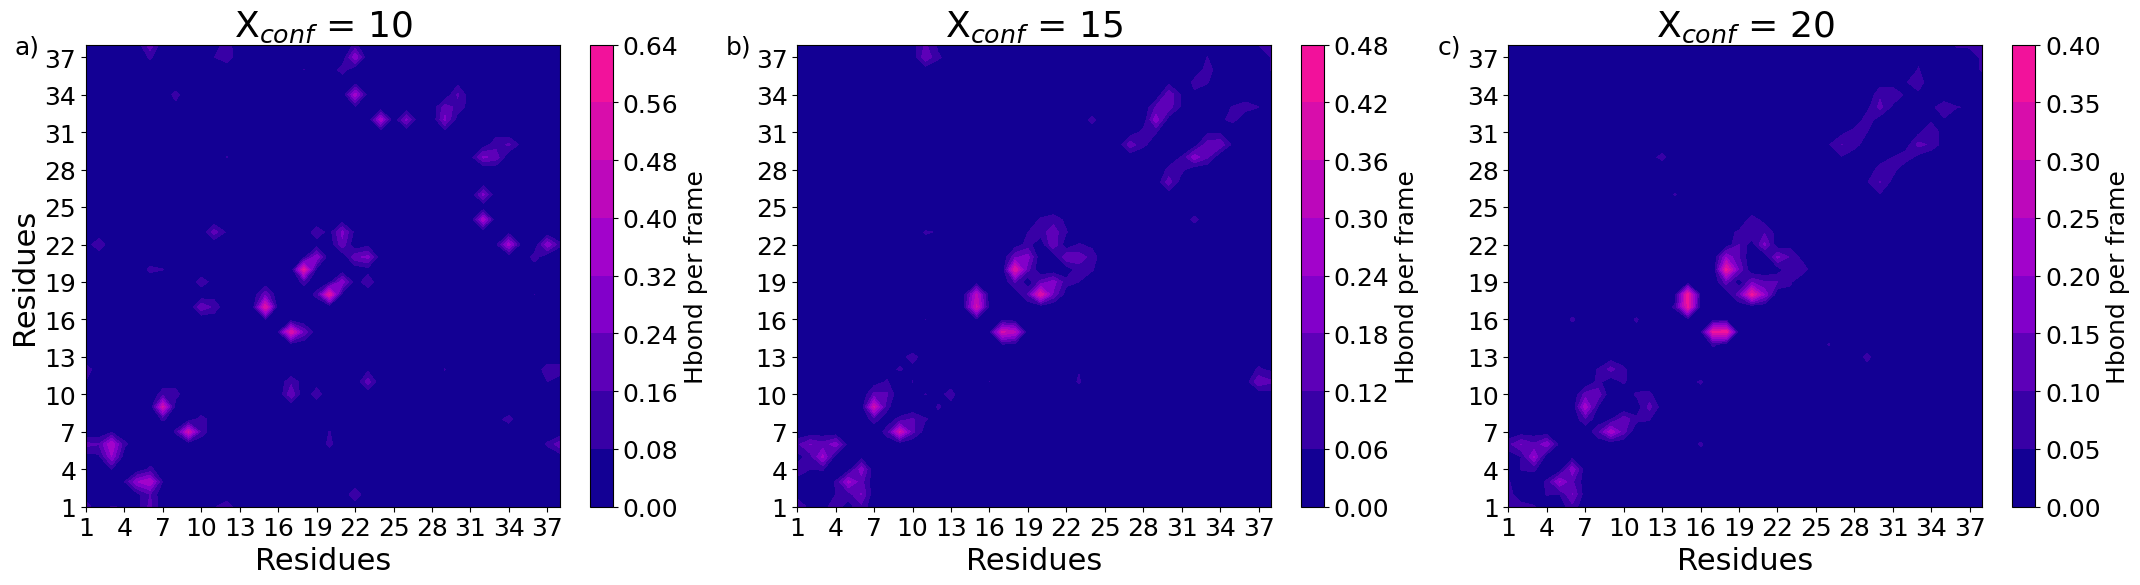

In [9]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(26, 6))
Seq_x = np.expand_dims(np.arange(1, (chain_length + 1)), axis=0)
Seq_y = np.expand_dims(np.arange(1, (chain_length + 1)), axis=1)
XX, YY = np.meshgrid(Seq_x, Seq_y)
length = range(0, chain_length, 1)

for i in length:
    file = path + 'CoE/Hbond_10/' + 'Res' + str(i) + '/out.dat'
    a, b = np.genfromtxt(file, unpack=True)
    if i == 0:
        Z = b
    elif i == 1:
        Z = np.append(arr=[Z], values=[b], axis=0)
    else:
        Z = np.append(arr=Z, values=[b], axis=0)
im = ax[0].contourf(XX, YY, (Z/15565), cmap=cmap)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Hbond per frame', fontsize=18)
for i in length:
    file = path + 'CoE/Hbond_15/' + 'Res' + str(i) + '/out.dat'
    a, b = np.genfromtxt(file, unpack=True)
    if i == 0:
        Z = b
    elif i == 1:
        Z = np.append(arr=[Z], values=[b], axis=0)
    else:
        Z = np.append(arr=Z, values=[b], axis=0)
im = ax[1].contourf(XX, YY, (Z/128106), cmap=cmap)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Hbond per frame', fontsize=18)
for i in length:
    file = path + 'CoE/Hbond_20/' + 'Res' + str(i) + '/out.dat'
    a, b = np.genfromtxt(file, unpack=True)
    if i == 0:
        Z = b
    elif i == 1:
        Z = np.append(arr=[Z], values=[b], axis=0)
    else:
        Z = np.append(arr=Z, values=[b], axis=0)
im = ax[2].contourf(XX, YY, (Z/14778), cmap=cmap)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Hbond per frame', fontsize=18)

ax[0].set_xticks(range(1, 39, 3))
ax[1].set_xticks(range(1, 39, 3))
ax[2].set_xticks(range(1, 39, 3))
ax[0].set_yticks(range(1, 39, 3))
ax[1].set_yticks(range(1, 39, 3))
ax[2].set_yticks(range(1, 39, 3))
ax[0].set_ylabel('Residues', fontsize=22)
ax[0].set_xlabel('Residues', fontsize=22)
ax[1].set_xlabel('Residues', fontsize=22)
ax[2].set_xlabel('Residues', fontsize=22)
ax[0].set_title('X$_{conf}$ = 10', fontsize=26)
ax[1].set_title('X$_{conf}$ = 15', fontsize=26)
ax[2].set_title('X$_{conf}$ = 20', fontsize=26)
ax[0].text(-0.15,0.98,"a)",fontsize=18,transform=ax[0].transAxes)
ax[1].text(-0.15,0.98,"b)",fontsize=18,transform=ax[1].transAxes)
ax[2].text(-0.15,0.98,"c)",fontsize=18,transform=ax[2].transAxes)
ax[0].tick_params(labelsize=18)
ax[1].tick_params(labelsize=18)
ax[2].tick_params(labelsize=18)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/Hbond_map.png', bbox_inches='tight')

In [13]:
d = np.genfromtxt((path + 'CoE/Hbond_20/5-3.xvg'), usecols=(1), unpack=True, skip_header=24)
print((sum(d)/len(d))*10)
d = np.genfromtxt((path + 'CoE/Hbond_20/9-7.xvg'), usecols=(1), unpack=True, skip_header=24)
print((sum(d)/len(d))*10)
d = np.genfromtxt((path + 'CoE/Hbond_20/17-15.xvg'), usecols=(1), unpack=True, skip_header=24)
print((sum(d)/len(d))*10)
d = np.genfromtxt((path + 'CoE/Hbond_20/18-15.xvg'), usecols=(1), unpack=True, skip_header=24)
print((sum(d)/len(d))*10)
d = np.genfromtxt((path + 'CoE/Hbond_20/20-18.xvg'), usecols=(1), unpack=True, skip_header=24)
print((sum(d)/len(d))*10)
d = np.genfromtxt((path + 'CoE/Hbond_20/22-21.xvg'), usecols=(1), unpack=True, skip_header=24)
print((sum(d)/len(d))*10)
d = np.genfromtxt((path + 'CoE/Hbond_20/32-29.xvg'), usecols=(1), unpack=True, skip_header=24)
print((sum(d)/len(d))*10)

3.21125253755582
3.2506935985924863
2.946175395858724
3.950198267695209
2.853838137772369
1.340485180673995
6.224872107186363


## Clustering

In [10]:
traj_file = path + 'CoE/12.xtc'
top_file = path + 'protein_1.gro'
traj = md.load(traj_file, top=top_file)
phi = md.compute_phi(traj)[1]
psi = md.compute_psi(traj)[1]
phipsi = np.hstack([phi, psi])

def runPCA(data, dim=2):
    print("Running PCA...")
    pca = PCA(n_components=dim)
    reduced = pca.fit_transform(data)
    return reduced
pca_phipsi = runPCA(phipsi)

PC1 = []
PC2 = []
for array in pca_phipsi:
    PC1.append(array[0])
    PC2.append(array[1])
with open(path + 'CoE/PCA_20.dat', 'w') as save:
    for (p1, p2) in zip(PC1, PC2):
        save.write(str(p1) + ' ' + str(p2) + ' ' + '\n')

Running PCA...


In [11]:
p1, p2 = np.genfromtxt((path + 'CoE/PCA_10.dat'), usecols=(0, 1), unpack=True)
p1 = np.array_split(p1, len(p1))
p2 = np.array_split(p2, len(p2))
pca10_phipsi = np.hstack([p1, p2])
p1, p2 = np.genfromtxt((path + 'CoE/PCA_15.dat'), usecols=(0, 1), unpack=True)
p1 = np.array_split(p1, len(p1))
p2 = np.array_split(p2, len(p2))
pca15_phipsi = np.hstack([p1, p2])
p1, p2 = np.genfromtxt((path + 'CoE/PCA_20.dat'), usecols=(0, 1), unpack=True)
p1 = np.array_split(p1, len(p1))
p2 = np.array_split(p2, len(p2))
pca20_phipsi = np.hstack([p1, p2])

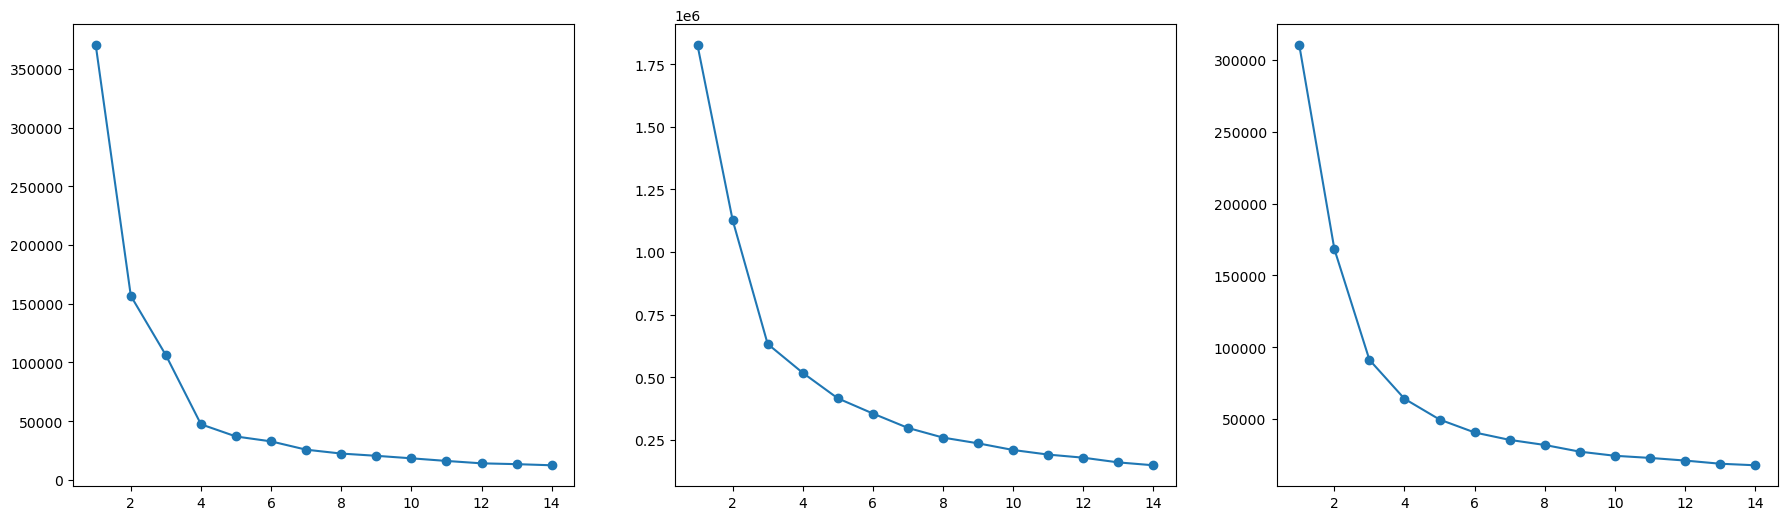

In [12]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(22, 6))

I = []
counter = 1
for nr in range(1, 15, 1):
    kmeans = KMeans(n_clusters=counter, random_state=44).fit(pca10_phipsi)
    I.append(kmeans.inertia_)
    counter += 1
ax[0].plot(range(1, 15, 1), I, marker='o')

I = []
counter = 1
for nr in range(1, 15, 1):
    kmeans = KMeans(n_clusters=counter, random_state=44).fit(pca15_phipsi)
    I.append(kmeans.inertia_)
    counter += 1
ax[1].plot(range(1, 15, 1), I, marker='o')

I = []
counter = 1
for nr in range(1, 15, 1):
    kmeans = KMeans(n_clusters=counter, random_state=44).fit(pca20_phipsi)
    I.append(kmeans.inertia_)
    counter += 1
ax[2].plot(range(1, 15, 1), I, marker='o')

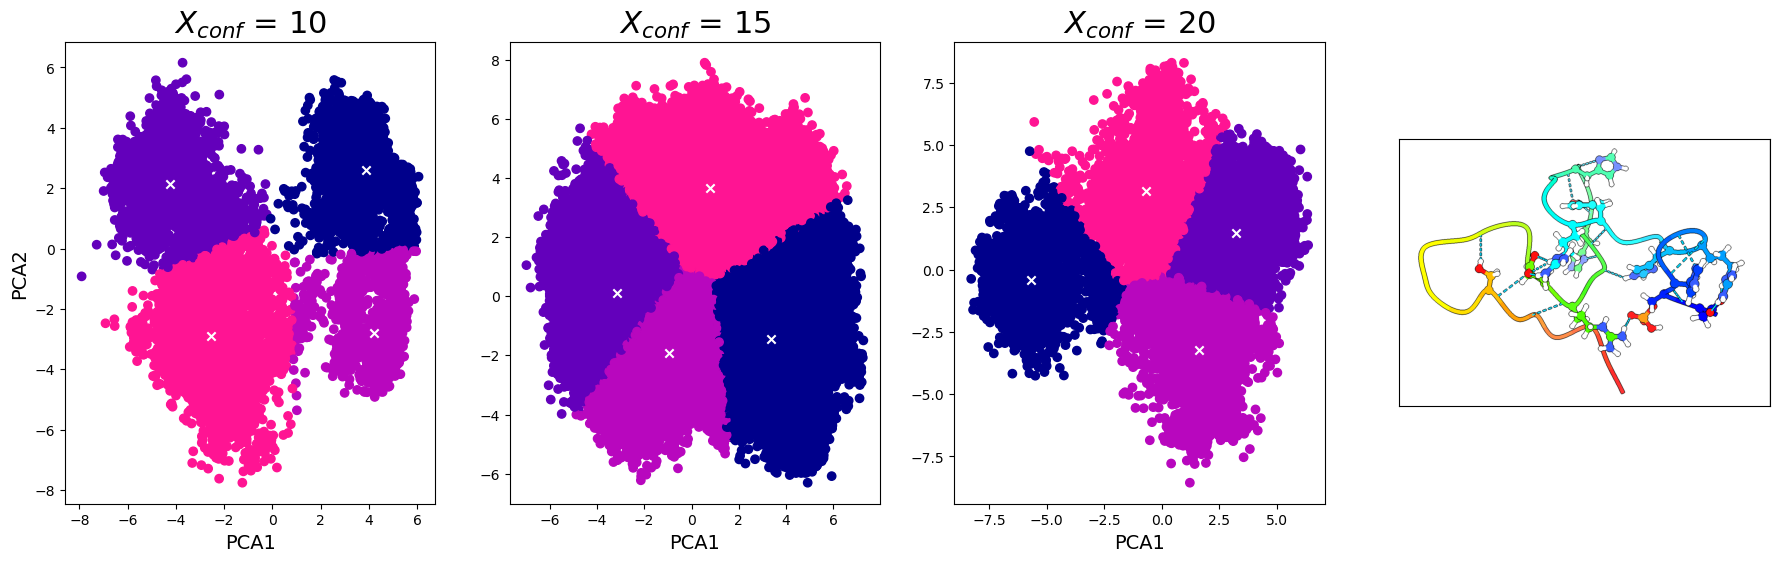

In [142]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(22, 6))

kmeans = KMeans(n_clusters=4, random_state=44).fit(pca10_phipsi)
labels10 = kmeans.predict(pca10_phipsi)
centroids = kmeans.cluster_centers_
ax[0].scatter(pca10_phipsi[:,0], pca10_phipsi[:,1], c=labels10, cmap=cmap)
ax[0].scatter(centroids[:, 0], centroids[:, 1], marker='x', color='white')

kmeans = KMeans(n_clusters=4, random_state=44).fit(pca15_phipsi)
labels15 = kmeans.predict(pca15_phipsi)
centroids = kmeans.cluster_centers_
ax[1].scatter(pca15_phipsi[:,0], pca15_phipsi[:,1], c=labels15, cmap=cmap)
ax[1].scatter(centroids[:, 0], centroids[:, 1], marker='x', color='white')

kmeans = KMeans(n_clusters=4, random_state=44).fit(pca20_phipsi)
labels20 = kmeans.predict(pca20_phipsi)
centroids = kmeans.cluster_centers_
ax[2].scatter(pca20_phipsi[:,0], pca20_phipsi[:,1], c=labels20, cmap=cmap)
ax[2].scatter(centroids[:, 0], centroids[:, 1], marker='x', color='white')

ax[0].set_ylabel('PCA2', fontsize=14)
ax[0].set_xlabel('PCA1', fontsize=14)
ax[1].set_xlabel('PCA1', fontsize=14)
ax[2].set_xlabel('PCA1', fontsize=14)
ax[0].set_title('$X_{conf}$ = 10', fontsize=22)
ax[1].set_title('$X_{conf}$ = 15', fontsize=22)
ax[2].set_title('$X_{conf}$ = 20', fontsize=22)

img = mpimg.imread('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/X10_C1.png')
imgplot = ax[3].imshow(img)
ax[3].set_xticks([])
ax[3].set_yticks([])

plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/KMeans.png', bbox_inches='tight')

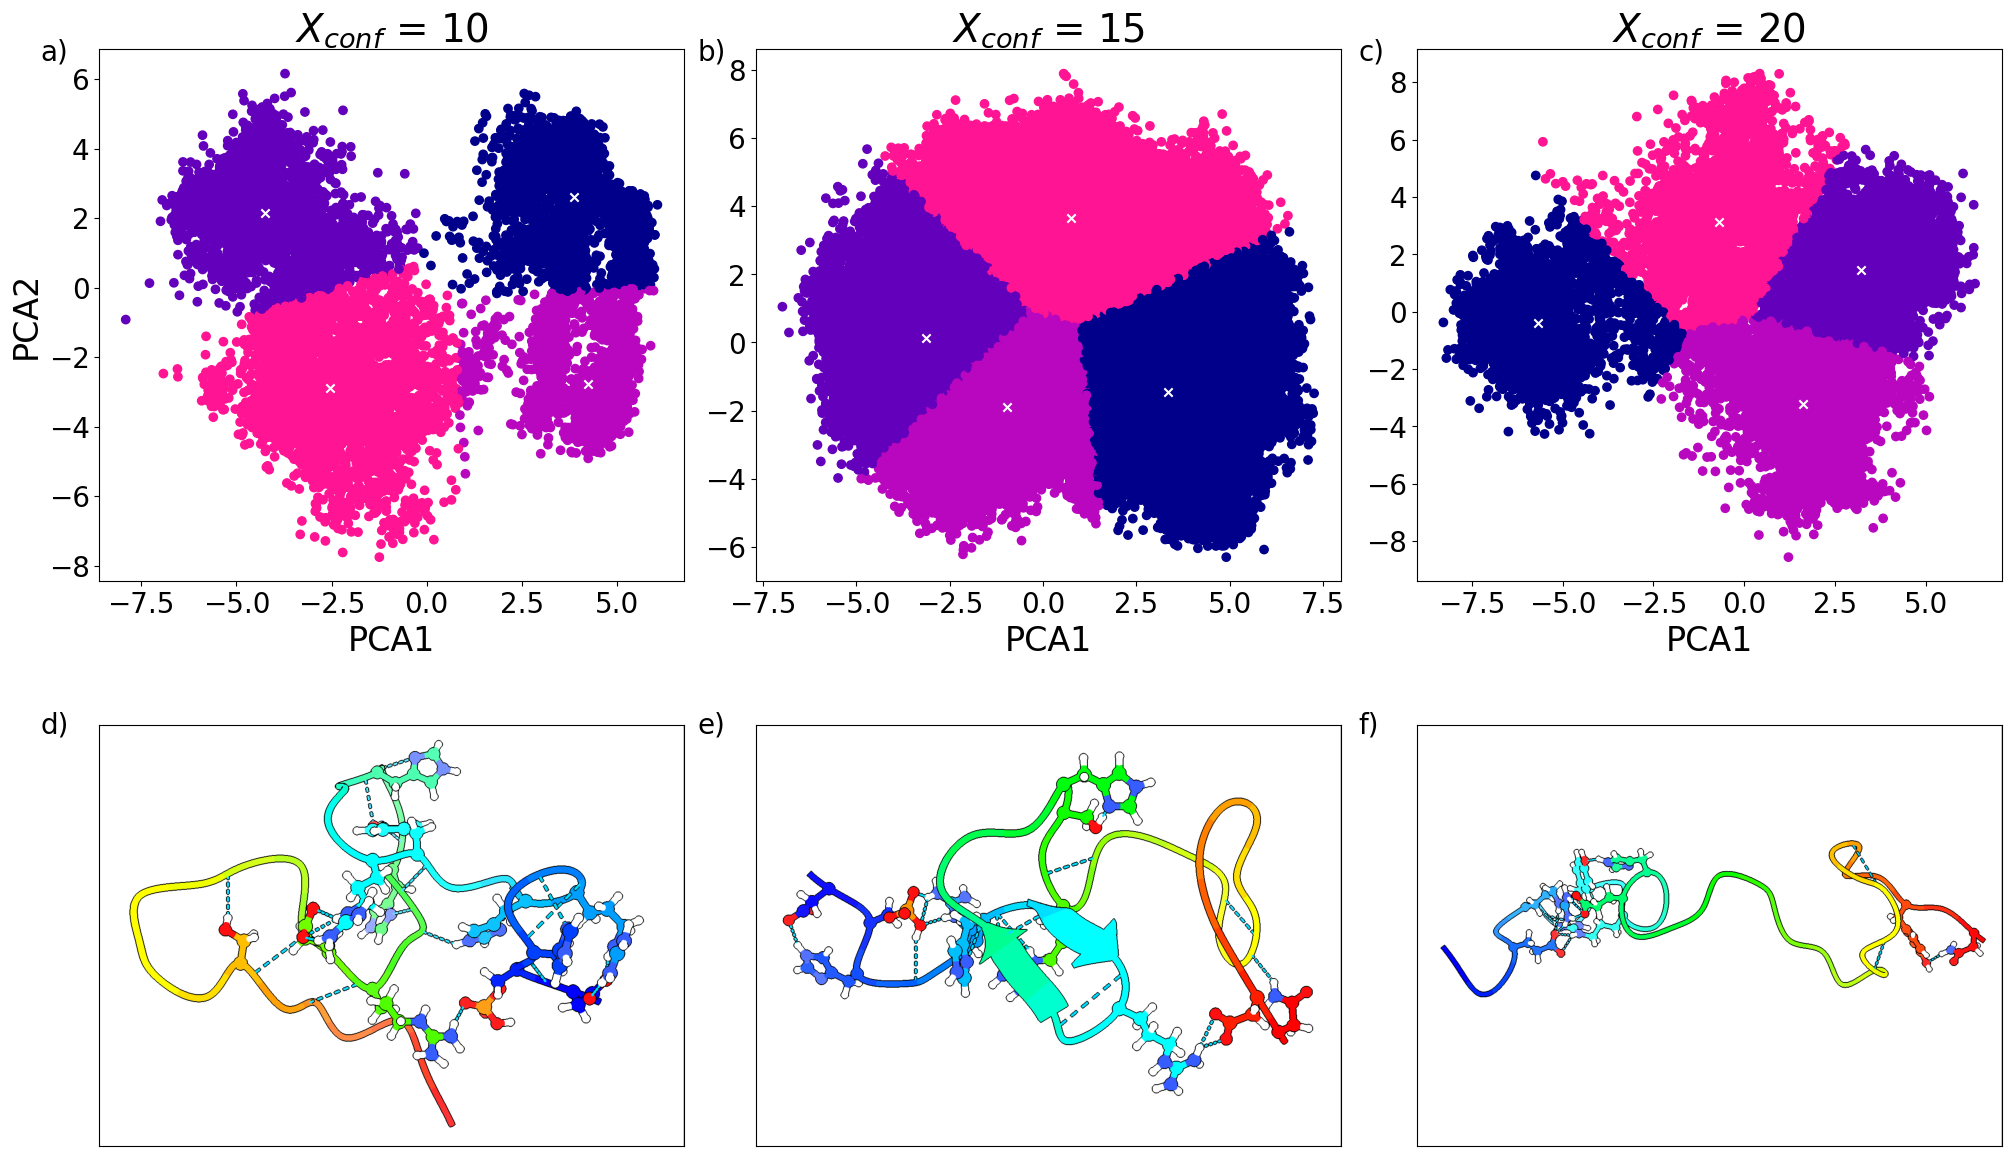

In [16]:
fig, ax = plt.subplot_mosaic([['upper left', 'upper center', 'upper right'],
                               ['lower left', 'lower center', 'lower right']], 
                              figsize=(20, 12), layout='constrained')

kmeans = KMeans(n_clusters=4, random_state=44).fit(pca10_phipsi)
labels10 = kmeans.predict(pca10_phipsi)
centroids = kmeans.cluster_centers_
ax['upper left'].scatter(pca10_phipsi[:,0], pca10_phipsi[:,1], c=labels10, cmap=cmap)
ax['upper left'].scatter(centroids[:, 0], centroids[:, 1], marker='x', color='white')

kmeans = KMeans(n_clusters=4, random_state=44).fit(pca15_phipsi)
labels15 = kmeans.predict(pca15_phipsi)
centroids = kmeans.cluster_centers_
ax['upper center'].scatter(pca15_phipsi[:,0], pca15_phipsi[:,1], c=labels15, cmap=cmap)
ax['upper center'].scatter(centroids[:, 0], centroids[:, 1], marker='x', color='white')

kmeans = KMeans(n_clusters=4, random_state=44).fit(pca20_phipsi)
labels20 = kmeans.predict(pca20_phipsi)
centroids = kmeans.cluster_centers_
ax['upper right'].scatter(pca20_phipsi[:,0], pca20_phipsi[:,1], c=labels20, cmap=cmap)
ax['upper right'].scatter(centroids[:, 0], centroids[:, 1], marker='x', color='white')

ax['upper left'].set_ylabel('PCA2', fontsize=24)
ax['upper left'].set_xlabel('PCA1', fontsize=24)
ax['upper center'].set_xlabel('PCA1', fontsize=24)
ax['upper right'].set_xlabel('PCA1', fontsize=24)
ax['upper left'].set_title('$X_{conf}$ = 10', fontsize=28)
ax['upper center'].set_title('$X_{conf}$ = 15', fontsize=28)
ax['upper right'].set_title('$X_{conf}$ = 20', fontsize=28)

img = mpimg.imread('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/X10_C1.png')
imgplot = ax['lower left'].imshow(img)
img = mpimg.imread('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/X15_C1.png')
imgplot = ax['lower center'].imshow(img)
img = mpimg.imread('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/X20_C1.png')
imgplot = ax['lower right'].imshow(img)
ax['lower left'].set_xticks([])
ax['lower left'].set_yticks([])
ax['lower center'].set_xticks([])
ax['lower center'].set_yticks([])
ax['lower right'].set_xticks([])
ax['lower right'].set_yticks([])
ax['upper left'].text(-0.1,0.98,"a)",fontsize=20,transform=ax['upper left'].transAxes)
ax['upper center'].text(-0.1,0.98,"b)",fontsize=20,transform=ax['upper center'].transAxes)
ax['upper right'].text(-0.1,0.98,"c)",fontsize=20,transform=ax['upper right'].transAxes)
ax['lower left'].text(-0.1,0.98,"d)",fontsize=20,transform=ax['lower left'].transAxes)
ax['lower center'].text(-0.1,0.98,"e)",fontsize=20,transform=ax['lower center'].transAxes)
ax['lower right'].text(-0.1,0.98,"f)",fontsize=20,transform=ax['lower right'].transAxes)

ax['upper left'].tick_params(labelsize=20)
ax['upper center'].tick_params(labelsize=20)
ax['upper right'].tick_params(labelsize=20)
ax['upper right'].set_yticks(range(-8, 9, 2))

plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/KMeans.png', bbox_inches='tight')

In [22]:
c1 = []
c2 = []
c3 = []
c4 = []
counter = 0
for label in labels20:
    if label == 0:
        c1.append(counter)
    elif label == 1:
        c2.append(counter)
    elif label == 2:
        c3.append(counter)
    elif label == 3:
        c4.append(counter)
    counter += 1

with open(path + 'CoE/PCA_20.ndx', 'w') as file:
    file.write('[ cluster_1 ]' + '\n')
    counter = 0
    for frame in c1:
        if counter == 6:
            file.write('    ' + str(frame + 1) + '\n')
            counter = 0
        else:
            file.write('    ' + str(frame + 1))
            counter += 1
    file.write('\n')
    file.write('[ cluster_2 ]' + '\n')
    counter = 0
    for frame in c2:
        if counter == 6:
            file.write('    ' + str(frame + 1) + '\n')
            counter = 0
        else:
            file.write('    ' + str(frame + 1))
            counter += 1
    file.write('\n')
    file.write('[ cluster_3 ]' + '\n')
    counter = 0
    for frame in c3:
        if counter == 6:
            file.write('    ' + str(frame + 1) + '\n')
            counter = 0
        else:
            file.write('    ' + str(frame + 1))
            counter += 1
    file.write('\n')
    file.write('[ cluster_4 ]' + '\n')
    counter = 0
    for frame in c4:
        if counter == 6:
            file.write('    ' + str(frame + 1) + '\n')
            counter = 0
        else:
            file.write('    ' + str(frame + 1))
            counter += 1
    file.write('\n')

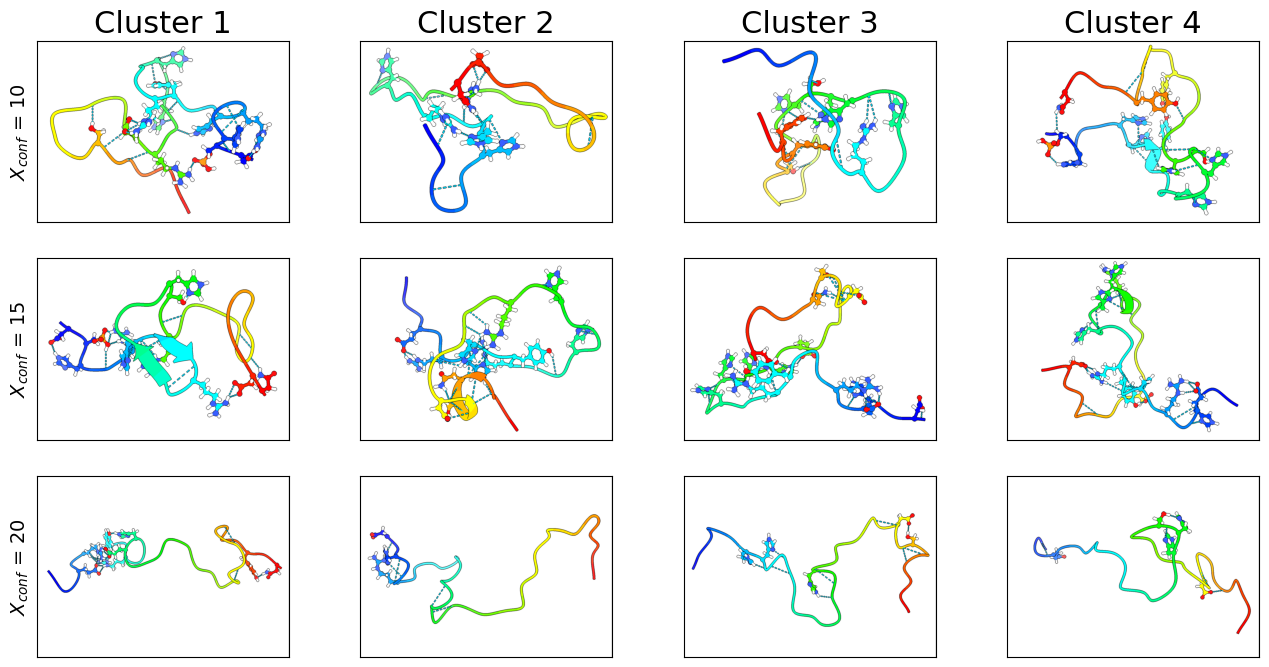

In [5]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16, 8))
img = mpimg.imread('/Users/oskarsvensson/Desktop/X10_C1.png')
imgplot = ax[0, 0].imshow(img)
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])
img = mpimg.imread('/Users/oskarsvensson/Desktop/X10_C2.png')
imgplot = ax[0, 1].imshow(img)
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])
img = mpimg.imread('/Users/oskarsvensson/Desktop/X10_C3.png')
imgplot = ax[0, 2].imshow(img)
ax[0, 2].set_xticks([])
ax[0, 2].set_yticks([])
img = mpimg.imread('/Users/oskarsvensson/Desktop/X10_C4.png')
imgplot = ax[0, 3].imshow(img)
ax[0, 3].set_xticks([])
ax[0, 3].set_yticks([])

img = mpimg.imread('/Users/oskarsvensson/Desktop/X15_C1.png')
imgplot = ax[1, 0].imshow(img)
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])
img = mpimg.imread('/Users/oskarsvensson/Desktop/X15_C2.png')
imgplot = ax[1, 1].imshow(img)
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])
img = mpimg.imread('/Users/oskarsvensson/Desktop/X15_C3.png')
imgplot = ax[1, 2].imshow(img)
ax[1, 2].set_xticks([])
ax[1, 2].set_yticks([])
img = mpimg.imread('/Users/oskarsvensson/Desktop/X15_C4.png')
imgplot = ax[1, 3].imshow(img)
ax[1, 3].set_xticks([])
ax[1, 3].set_yticks([])

img = mpimg.imread('/Users/oskarsvensson/Desktop/X20_C1.png')
imgplot = ax[2, 0].imshow(img)
ax[2, 0].set_xticks([])
ax[2, 0].set_yticks([])
img = mpimg.imread('/Users/oskarsvensson/Desktop/X20_C2.png')
imgplot = ax[2, 1].imshow(img)
ax[2, 1].set_xticks([])
ax[2, 1].set_yticks([])
img = mpimg.imread('/Users/oskarsvensson/Desktop/X20_C3.png')
imgplot = ax[2, 2].imshow(img)
ax[2, 2].set_xticks([])
ax[2, 2].set_yticks([])
img = mpimg.imread('/Users/oskarsvensson/Desktop/X20_C4.png')
imgplot = ax[2, 3].imshow(img)
ax[2, 3].set_xticks([])
ax[2, 3].set_yticks([])

ax[0, 0].set_title('Cluster 1', fontsize=22)
ax[0, 1].set_title('Cluster 2', fontsize=22)
ax[0, 2].set_title('Cluster 3', fontsize=22)
ax[0, 3].set_title('Cluster 4', fontsize=22)

ax[0, 0].set_ylabel('$X_{conf}$ = 10', fontsize=14)
ax[1, 0].set_ylabel('$X_{conf}$ = 15', fontsize=14)
ax[2, 0].set_ylabel('$X_{conf}$ = 20', fontsize=14)

plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/Snap.png', bbox_inches='tight')

## SAXS comparison

In [3]:
def pddf_load(file_path):
    with open(file_path) as PDDF:
        lines = PDDF.readlines()
        counter = 0
        for line in lines:
            if line == ref:
                start = counter + 2
            counter += 1
    PDDF.close()
    r, P = np.genfromtxt(file_path, skip_header=start, unpack=True, usecols=(0, 1))
    return r, P

0.2031975
0.2


/var/folders/5p/n17l_b1j1blc40n8pdg8y9bh0000gn/T/ipykernel_2313/2517693272.py:29: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  print(np.trapz(P_e, r_e)*6250)
/var/folders/5p/n17l_b1j1blc40n8pdg8y9bh0000gn/T/ipykernel_2313/2517693272.py:32: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  print(np.trapz(P_er, r_er)*6350)
/var/folders/5p/n17l_b1j1blc40n8pdg8y9bh0000gn/T/ipykernel_2313/2517693272.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  print(np.trapz(P_s, r_s)*7120)


1.011924221375
1.0122950942780002
1.021236873112


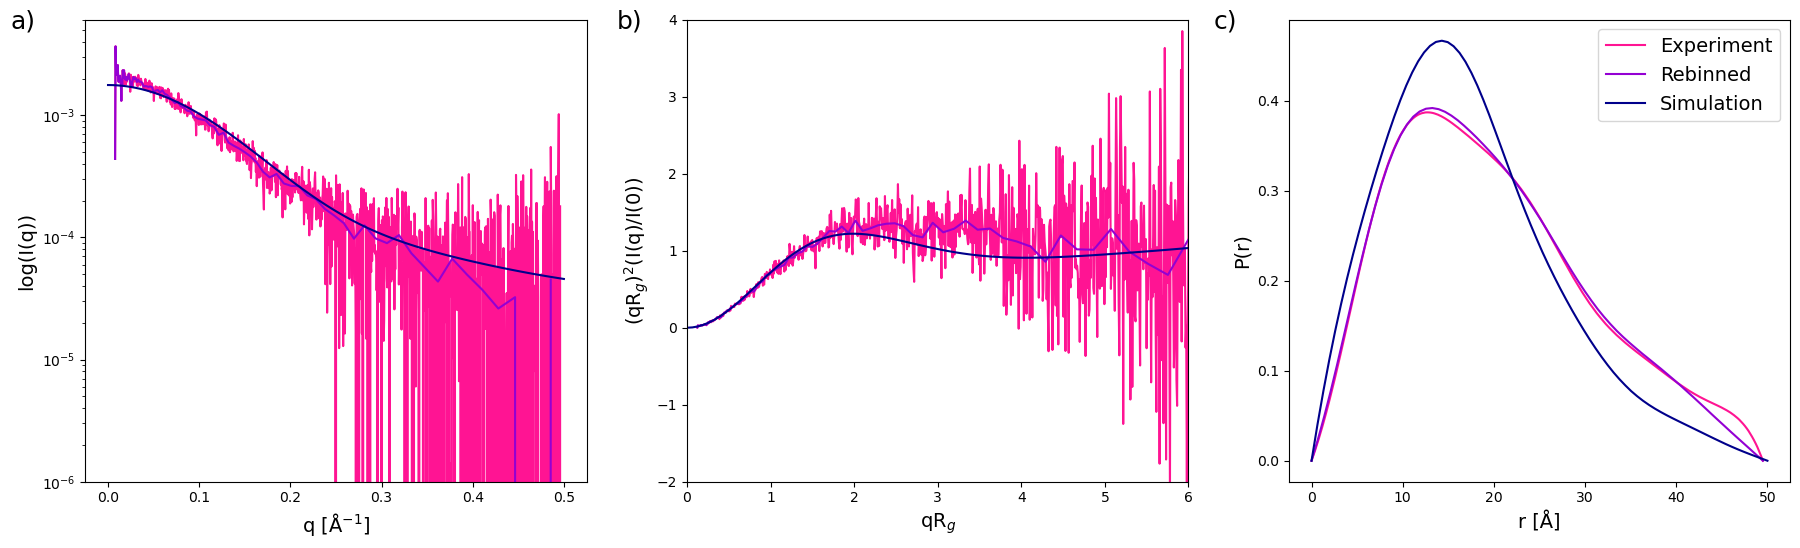

In [4]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(22, 6))
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/SAXS_data_Jan_2025_Grenoble/Hst1_HS/Hst1_HS_pro/0p21.dat'
q_e, I_e = np.genfromtxt(path, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=9)
q_e = q_e/10
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/SAXS_data_Jan_2025_Grenoble/Hst1_HS/Hst1_HS_pro/0p21_re.dat'
q_er, I_er = np.genfromtxt(path, usecols=(0, 1), unpack=True, skip_header=3, skip_footer=9)
q_er = q_er/10
path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/average.dat'
q_s, I_s = np.genfromtxt(path, usecols=(0, 1), unpack=True)
print(q_e[400])
print(q_s[40])

path = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/CoE/polystat.xvg'
Rg = np.genfromtxt(path, usecols=(2), unpack=True, skip_header=28)
Rg_ave = (sum(Rg)/len(Rg))*10
I0_e = 0.0021
Rg_e = 15.9
coeff = 1/(I_s[40]/I_e[400])
I_s = I_s*coeff
ax[0].plot(q_e, I_e, color='deeppink')
ax[0].plot(q_er, I_er, color='darkviolet')
ax[0].plot(q_s, I_s, color='darkblue')
ax[1].plot((q_e*Rg_e), (((q_e*Rg_e)**2)*(I_e/I0_e)), color='deeppink')
ax[1].plot((q_er*Rg_e), (((q_er*Rg_e)**2)*(I_er/I0_e)), color='darkviolet')
ax[1].plot((q_s*Rg_ave), (((q_s*Rg_ave)**2)*(I_s/I_s[0])), color='darkblue')

file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/SAXS_data_Jan_2025_Grenoble/Hst1_HS/Hst1_HS_pro/0p21.out'
r_e, P_e = pddf_load(file)
print(np.trapz(P_e, r_e)*6250)
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Experiment/SAXS_data_Jan_2025_Grenoble/Hst1_HS/Hst1_HS_pro/0p21_re.out'
r_er, P_er = pddf_load(file)
print(np.trapz(P_er, r_er)*6350)
file = '/Users/oskarsvensson/Science/FILES/ARTICLES/Decomp_Hst1/phospo/analysis/Sim.out'
r_s, P_s = pddf_load(file)
print(np.trapz(P_s, r_s)*7120)
ax[2].plot((r_e*10), (P_e*6250), color='deeppink')
ax[2].plot((r_er*10), (P_er*6350), color='darkviolet')
ax[2].plot((r_s*10), (P_s*7120), color='darkblue')

ax[2].legend(['Experiment', 'Rebinned', 'Simulation'], fontsize=14)
ax[0].set_yscale('log')
ax[0].set_ylim(10**-6)
ax[1].set_xlim(0, 6)
ax[1].set_ylim(-2, 4)
ax[0].set_xlabel('q [Å$^{-1}$]', fontsize=14)
ax[1].set_xlabel('qR$_{g}$', fontsize=14)
ax[2].set_xlabel('r [Å]', fontsize=14)
ax[0].set_ylabel('log(I(q))', fontsize=14)
ax[1].set_ylabel('(qR$_{g}$)$^2$(I(q)/I(0))', fontsize=14)
ax[2].set_ylabel('P(r)', fontsize=14)
ax[0].text(-0.15,0.98,"a)",fontsize=18,transform=ax[0].transAxes)
ax[1].text(1.06,0.98,"b)",fontsize=18,transform=ax[0].transAxes)
ax[2].text(2.25,0.98,"c)",fontsize=18,transform=ax[0].transAxes)
plt.savefig('/Users/oskarsvensson/Desktop/Current/Decomp_Hst1/SAXS_comp', bbox_inches='tight')

In [8]:
test = sum(((I_s[0:-2] - I_er)**2)/I_er)
print(test)

0.054005945553498275
